# Tutorial: Loading Data from MSMD
In this tutorial we show how to load the data and annotations delivered with
the Multimodal Audio Sheet Music (MSMD) dataset.

First we need to import a couple of python packages:

In [78]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from msmd.midi_parser import notes_to_onsets, FPS
from msmd.data_model.piece import Piece
from msmd.alignments import align_score_to_performance

Here we set the root path of the data set and select the piece we would like to load in this tutorial.

In [79]:
# path to MSMD data set
DATA_ROOT_MSMD = '/data/mirlab/msmd/msmd_aug/msmd_aug'

# select a piece you would like to view
piece_name = 'BachJS__BWV849__bwv849b'

## Loading the sheet image data
In the next couple of cells we load the sheet images along with their annotations.

In [80]:
# piece loading
piece = Piece(root=DATA_ROOT_MSMD, name=piece_name)
score = piece.load_score(piece.available_scores[0])

In [81]:
# get mungos
# (this is our annotation format containing for example system and notehead annotations)
mungos = score.load_mungos()
mdict = {m.objid: m for m in mungos}
mungos_per_page = score.load_mungos(by_page=True)

In [82]:
# load images
images = score.load_images()
print("Number of pages", len(images))

Number of pages 3


Lets visualize the sheet images.

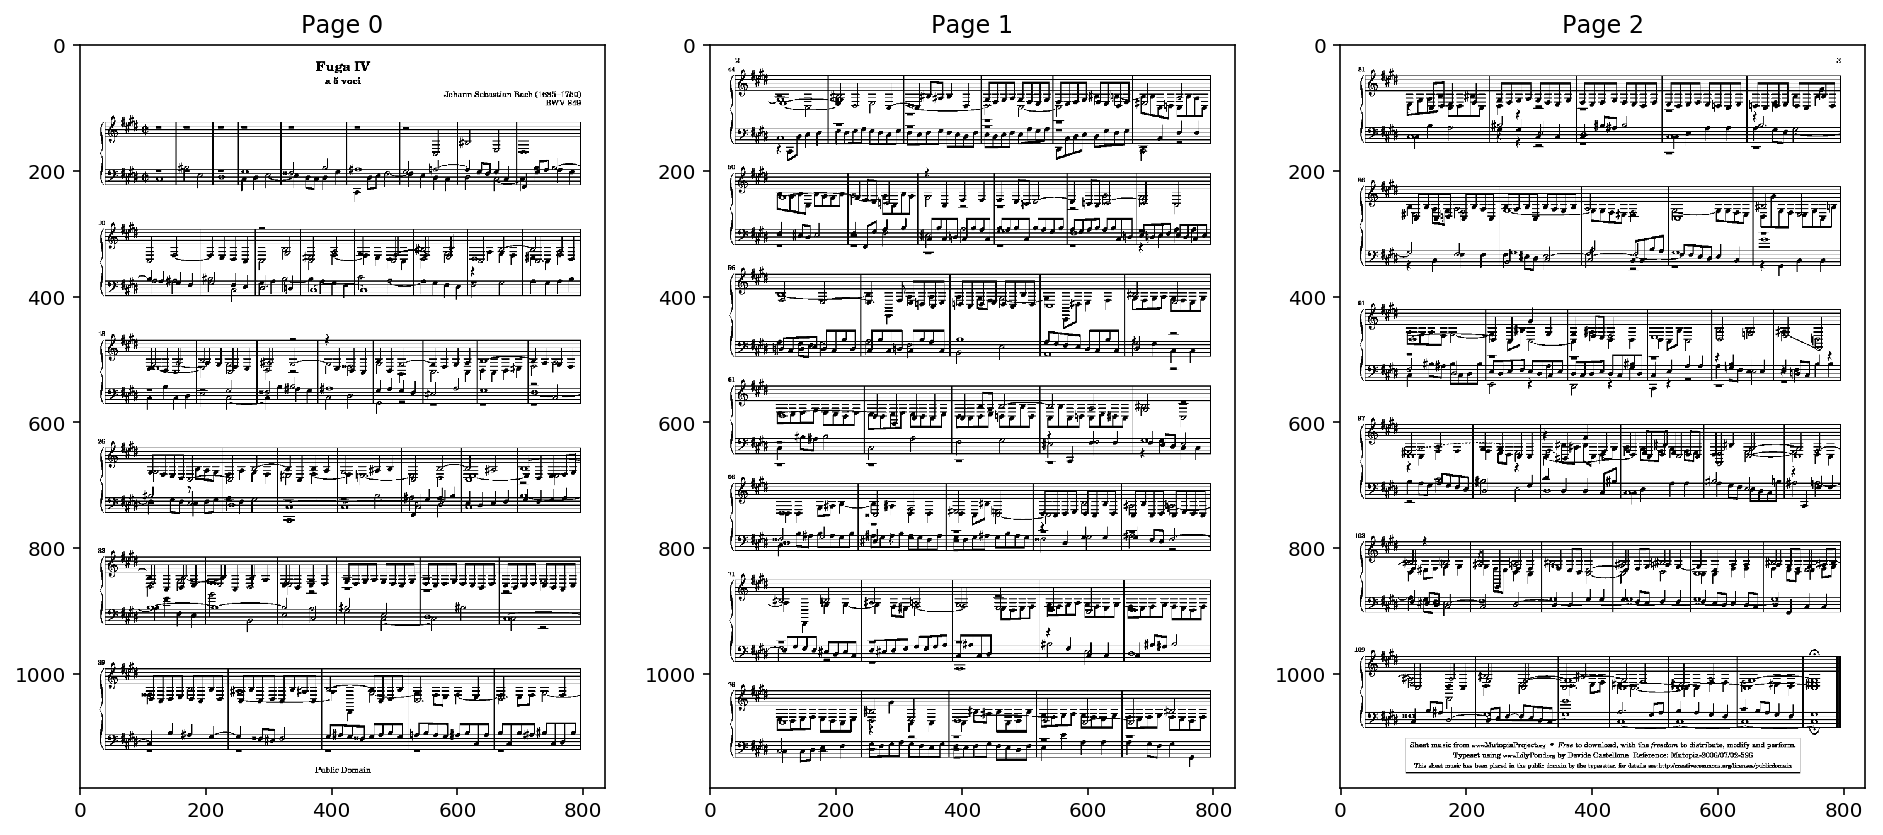

In [6]:
plt.figure("Sheet Images", figsize=(16, 8))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title("Page %d" % i)
plt.show()

Next we extract the staff system and note head annotations (only for the first page).

In [83]:
# get only systems
system_mungos = [c for c in mungos_per_page[1] if c.clsname == 'staff']
system_mungos = sorted(system_mungos, key=lambda m: m.top)

# get only noteheads
notehead_mungos = [c for c in mungos_per_page[1] if c.clsname == 'notehead-full']

In [32]:
# plot systems to sheet
for sys_mungo in system_mungos:
    t, l, b, r = sys_mungo.bounding_box
    

... and plot it along with the sheet image.

In [57]:
images[0].shape

(1181, 835)

48 36 158 796
203 37 318 796
363 37 496 796
541 36 651 796
696 36 804 796
849 36 981 796
1026 36 1133 796


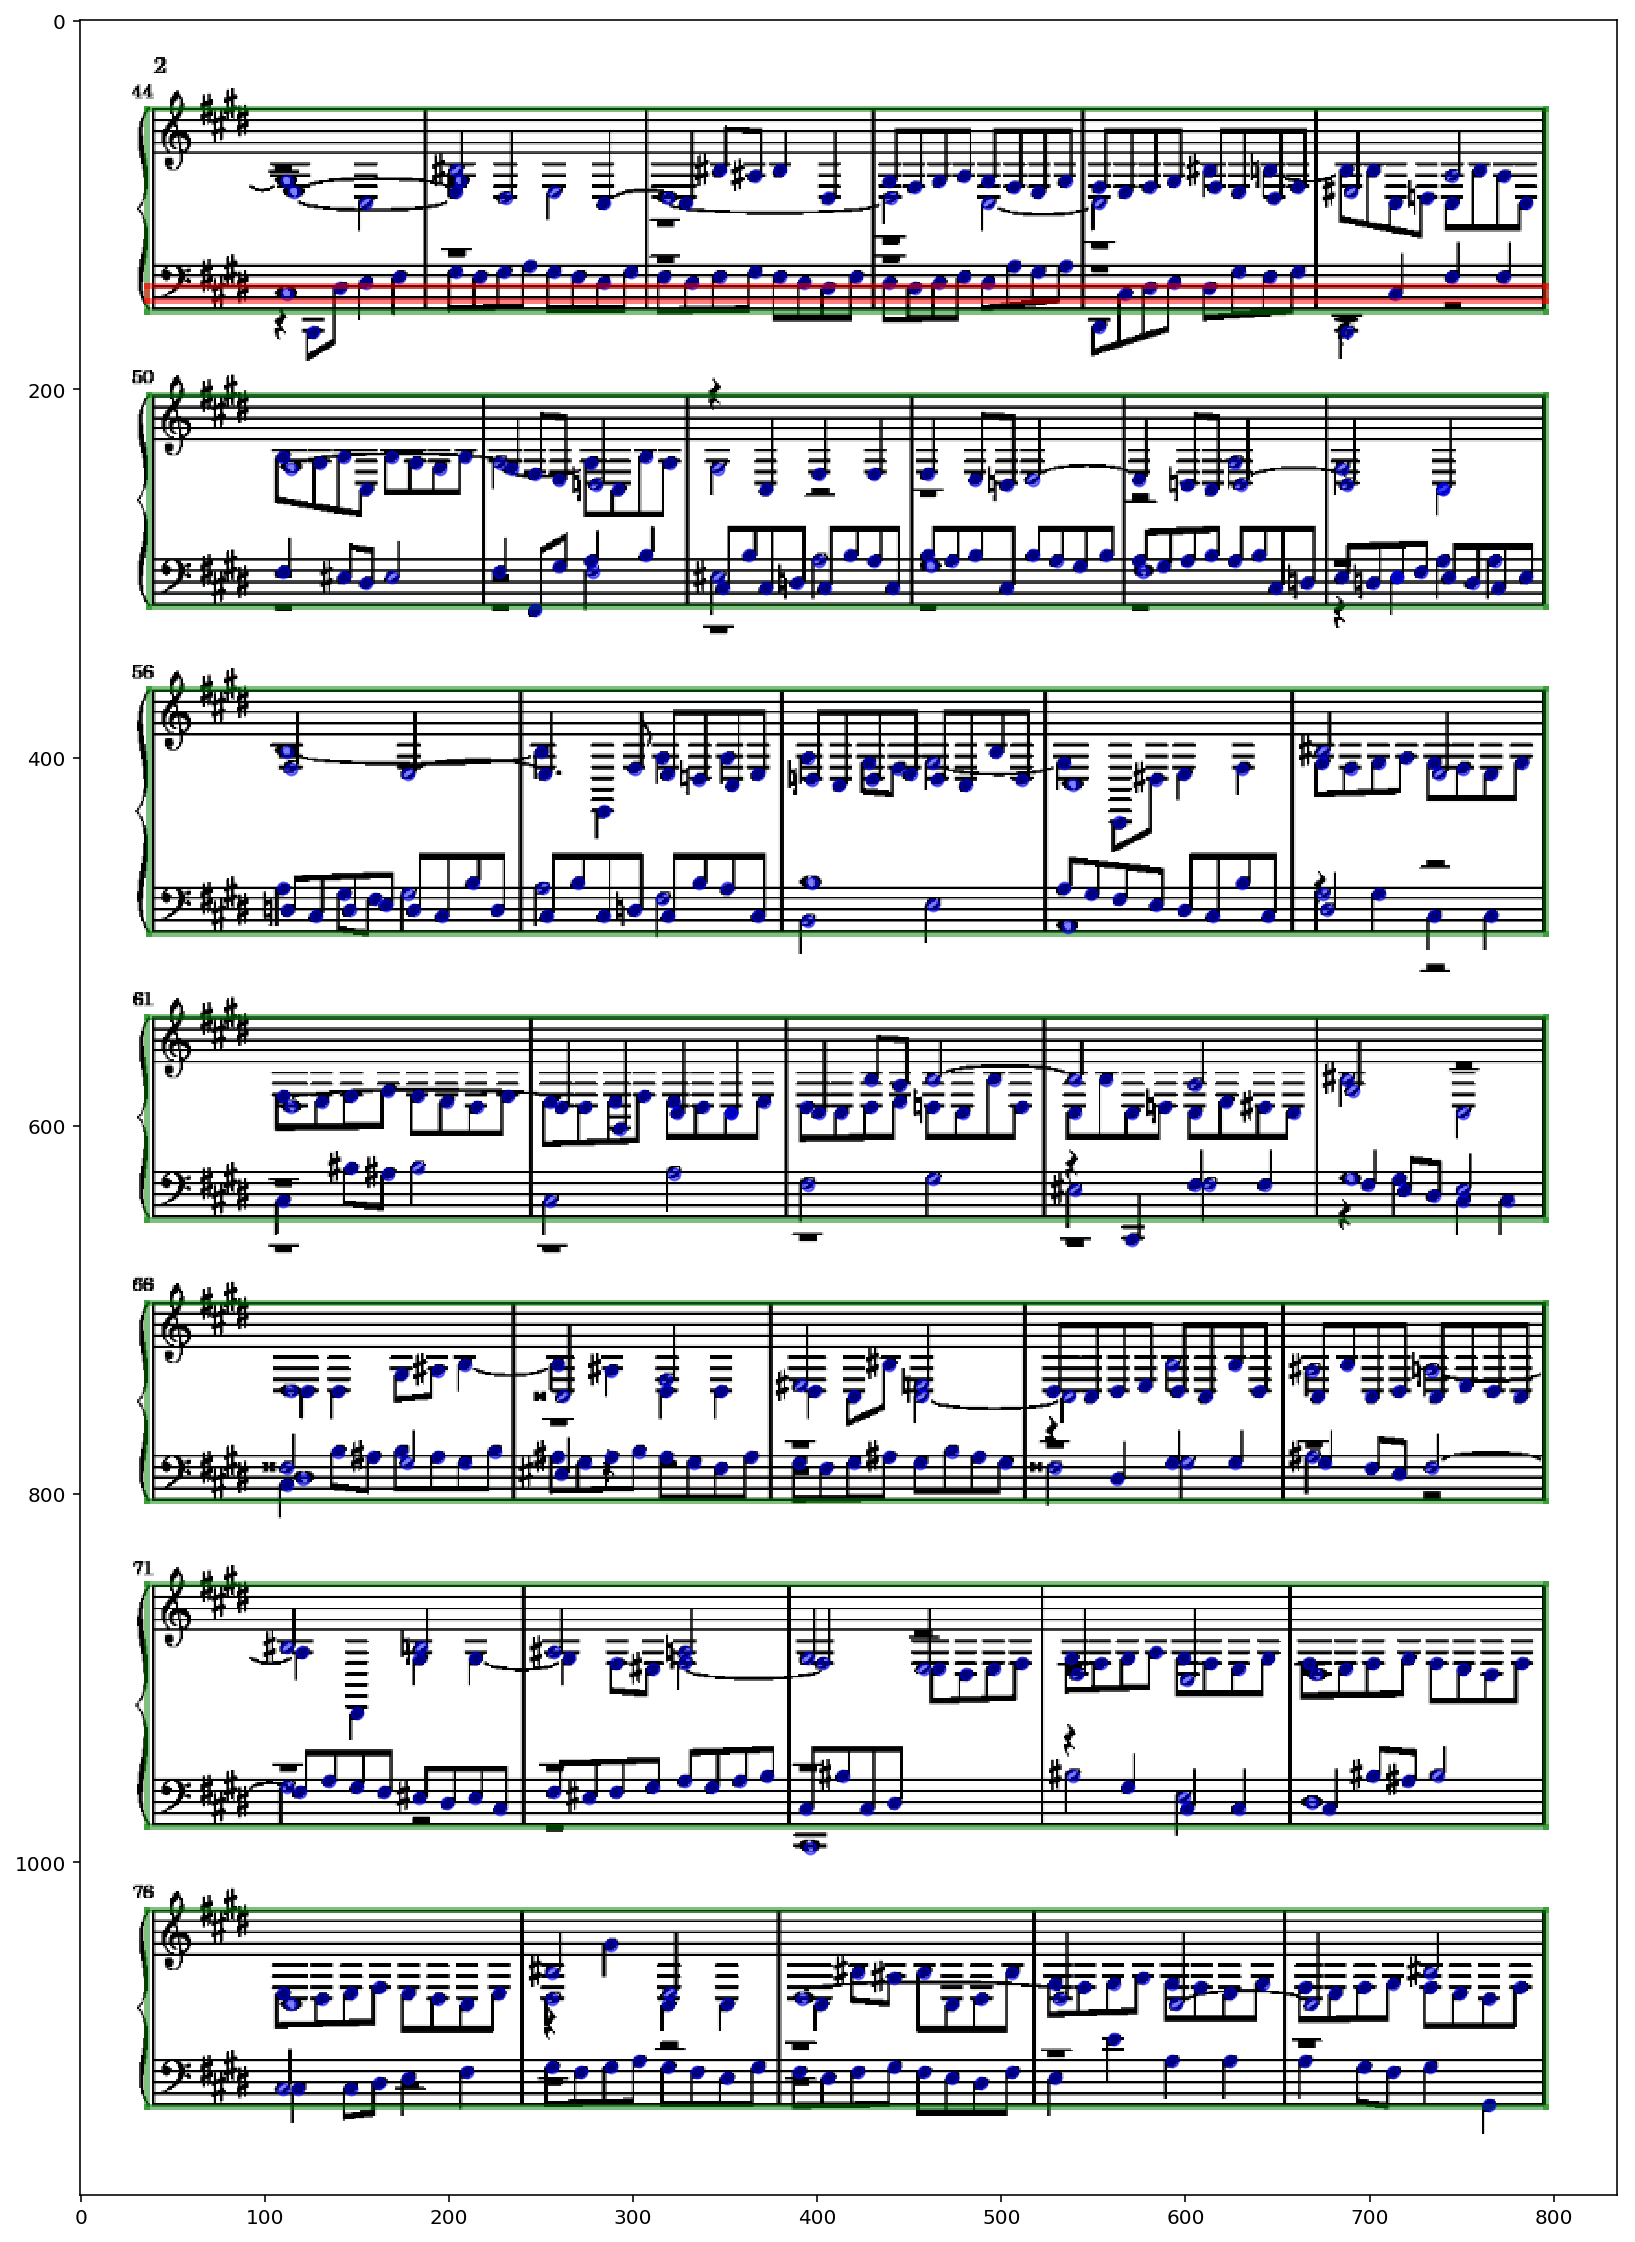

In [33]:
plt.figure("Page with Systems", figsize=(16, 20))
plt.imshow(images[1], cmap="gray")

# plot systems to sheet
for sys_mungo in system_mungos:
    t, l, b, r = sys_mungo.bounding_box
    print(t,l,b,r)
    plt.plot([l, r], [t, t], c='g', linewidth=3, alpha=0.5)
    plt.plot([l, r], [b, b], c='g', linewidth=3, alpha=0.5)
    plt.plot([l, l], [t, b], c='g', linewidth=3, alpha=0.5)
    plt.plot([r, r], [t, b], c='g', linewidth=3, alpha=0.5)

# plot noteheads to sheet
x_list = []
for n in notehead_mungos:
    x_list.append(n.middle[0])
    plt.plot(n.middle[1], n.middle[0], "bo", alpha=0.5)
#plt.show()

# plot individual straps
top, left, right, bottom = 0,0,0,0
for index in range(1,len(x_list)):
    # use index and index+2 as the x coordinate
    t, l, b, r = system_mungos[0].bounding_box
    t = x_list[index] - 4
    b = x_list[index] + 4
    top, left, bottom, right = t,l,b,r
    plt.plot([l, r], [t, t], c='r', linewidth=3, alpha=0.5)
    plt.plot([l, r], [b, b], c='r', linewidth=3, alpha=0.5)
    plt.plot([l, l], [t, b], c='r', linewidth=3, alpha=0.5)
    plt.plot([r, r], [t, b], c='r', linewidth=3, alpha=0.5)
    break

144 152 36 796


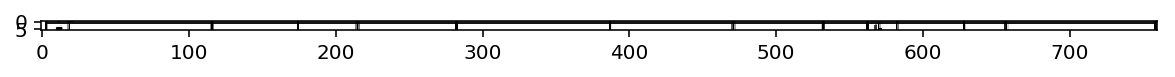

In [34]:
print(top, bottom, left, right)
plt.figure("Strip", figsize=(10,20))
plt.imshow(images[0][top+1:bottom-1,left:right], cmap="gray")
plt.savefig("tmp.jpg")

Grab strips of notes

48 36 158 796
203 37 318 796
363 37 496 796
541 36 651 796
696 36 804 796
849 36 981 796
1026 36 1133 796
[81, 84, 87, 90, 93, 96, 99, 133, 136, 139, 142, 145, 148, 166, 169, 237, 240, 243, 246, 249, 252, 254, 290, 293, 296, 299, 302, 305, 308, 320, 397, 400, 403, 406, 409, 412, 415, 429, 435, 468, 471, 474, 477, 480, 483, 486, 489, 492, 575, 578, 581, 584, 587, 590, 593, 602, 623, 626, 629, 632, 635, 638, 641, 662, 730, 733, 735, 738, 741, 744, 747, 777, 780, 783, 786, 789, 792, 795, 883, 886, 889, 892, 895, 898, 901, 919, 953, 956, 959, 962, 965, 968, 971, 992, 1045, 1060, 1063, 1066, 1068, 1071, 1074, 1077, 1096, 1108, 1111, 1114, 1117, 1120, 1123, 1132]
3.1363636363636362


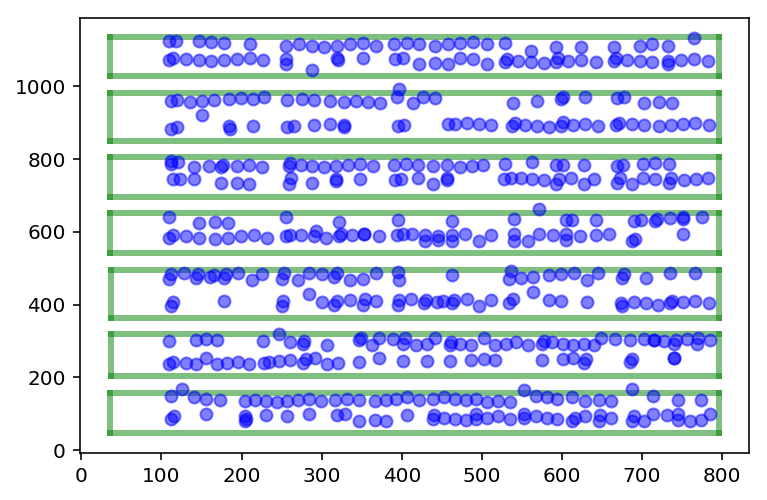

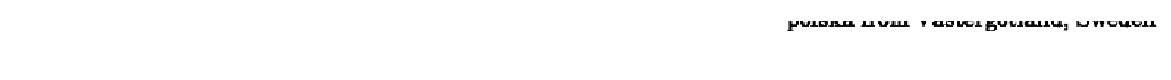

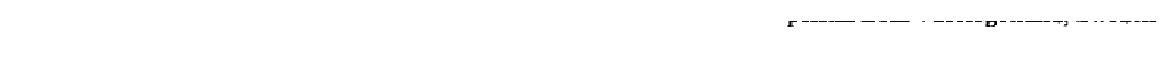

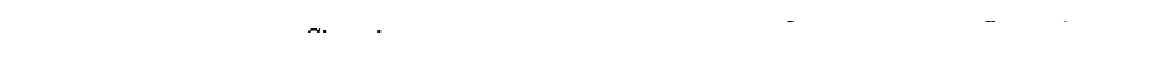

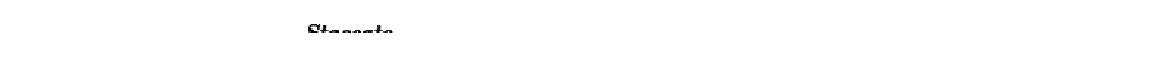

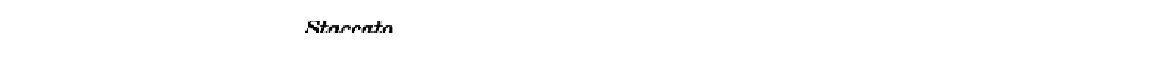

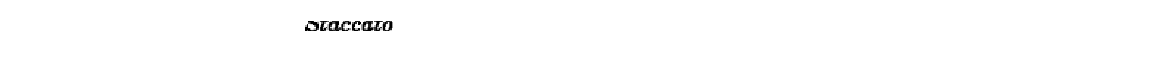

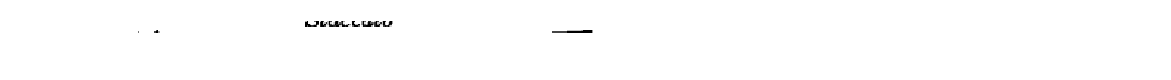

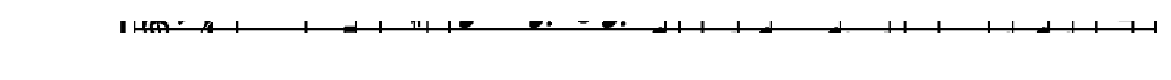

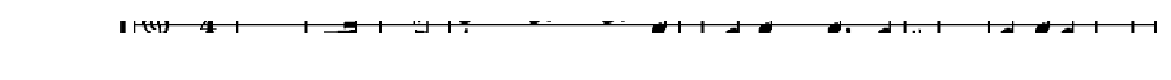

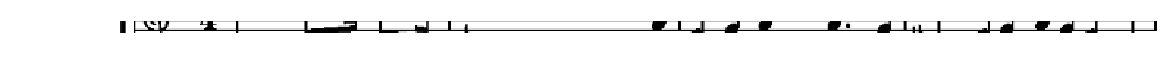

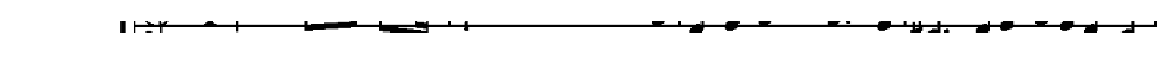

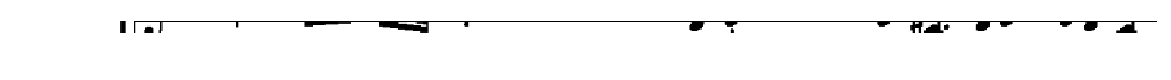

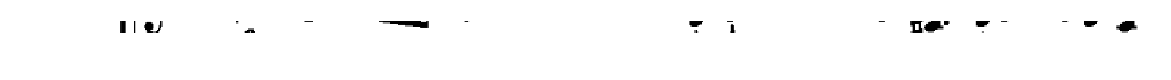

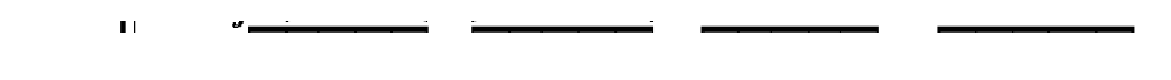

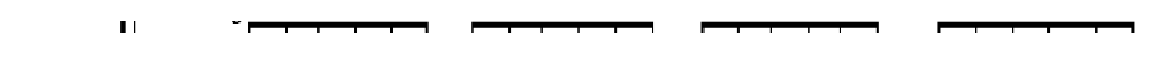

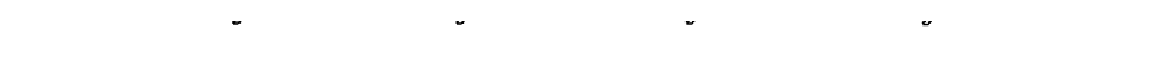

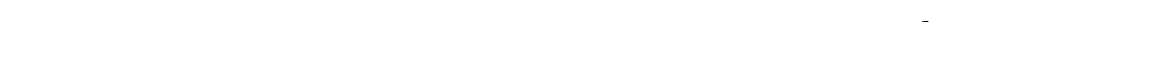

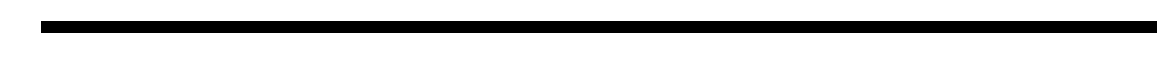

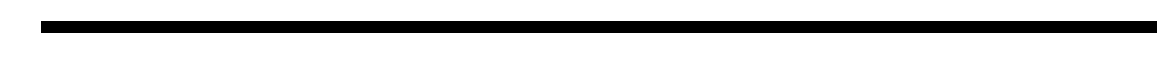

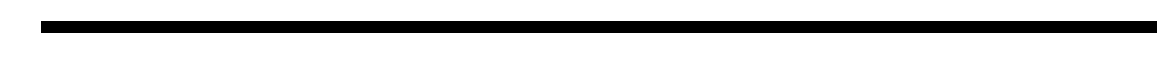

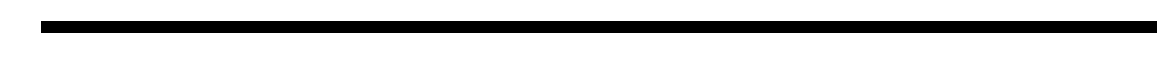

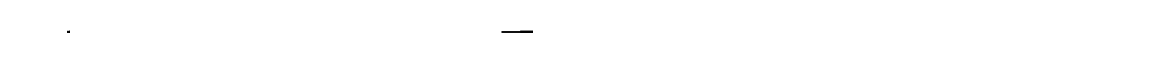

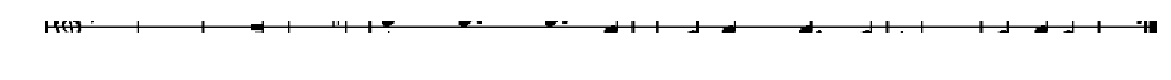

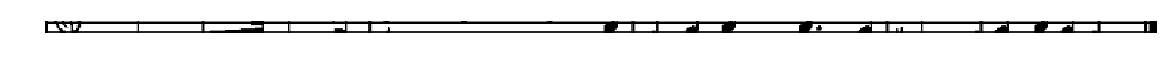

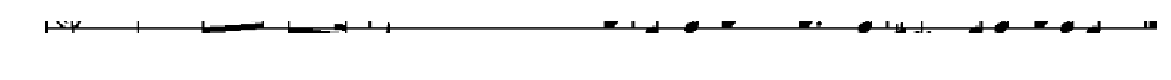

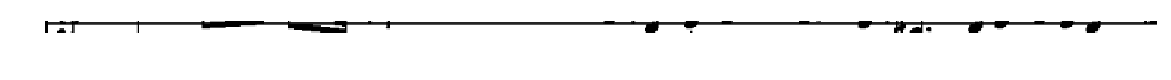

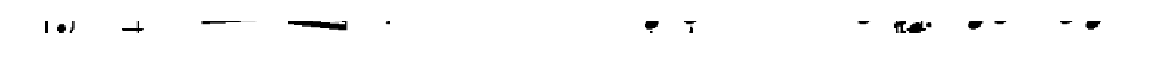

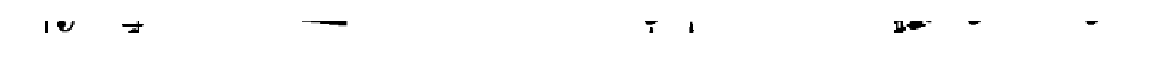

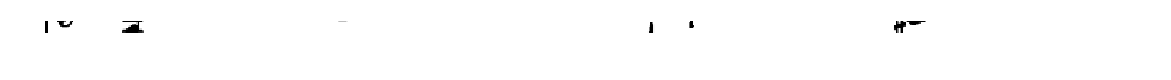

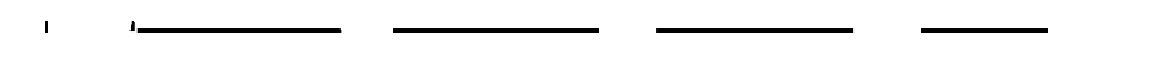

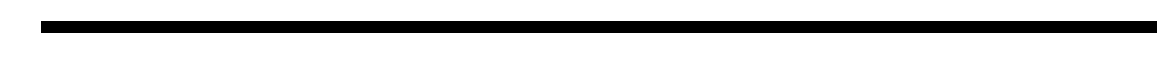

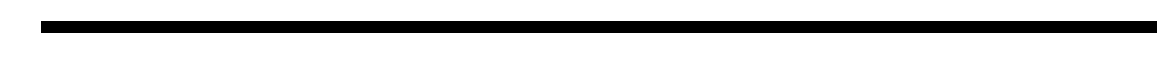

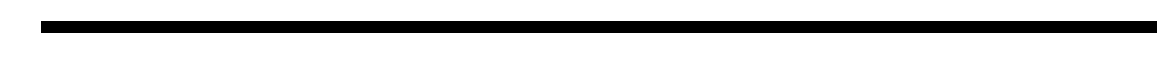

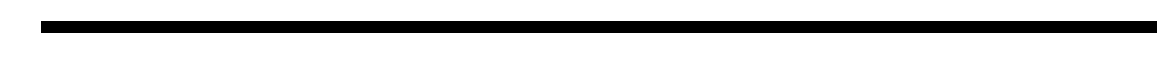

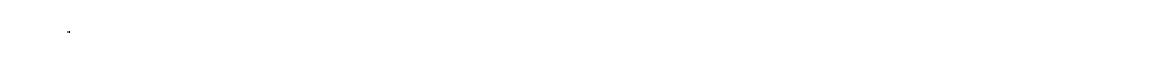

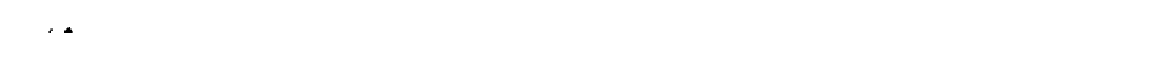

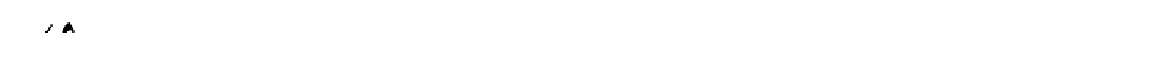

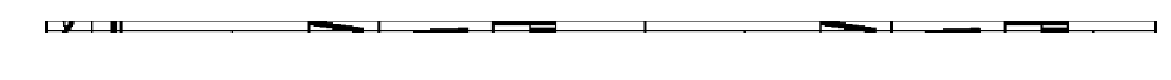

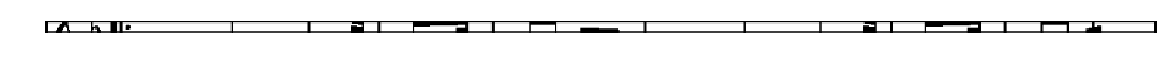

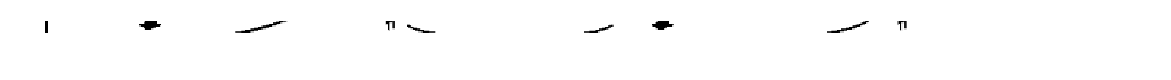

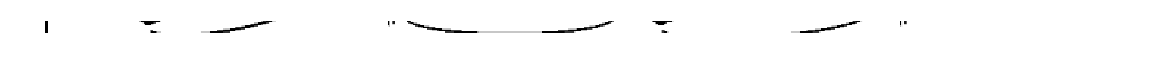

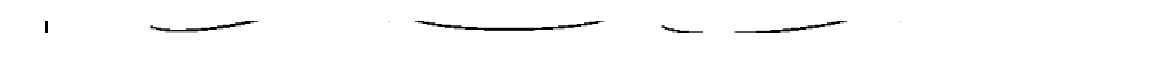

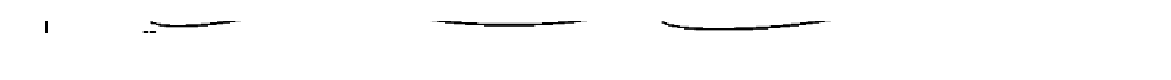

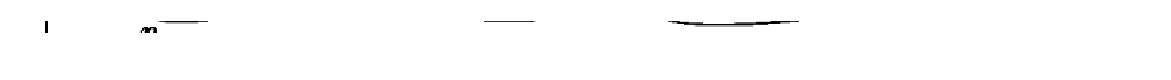

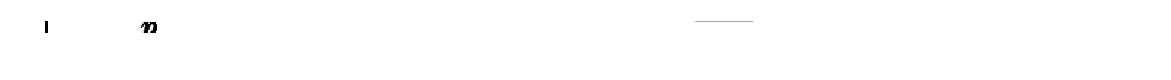

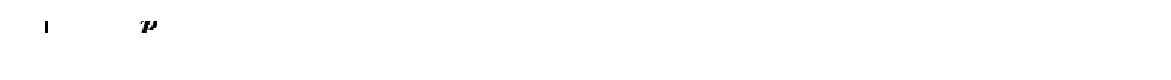

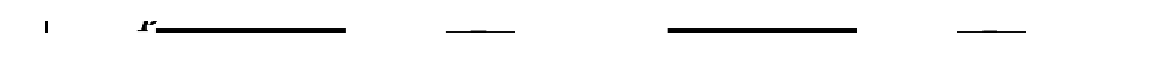

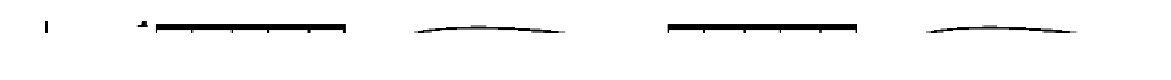

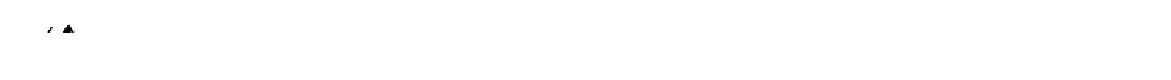

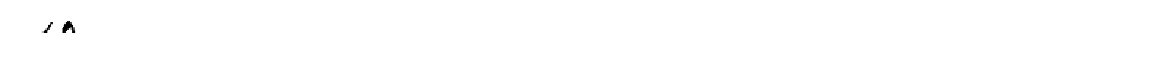

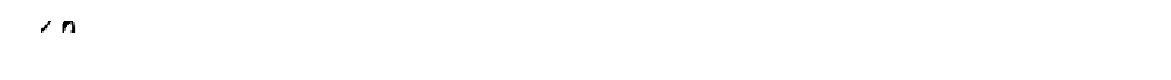

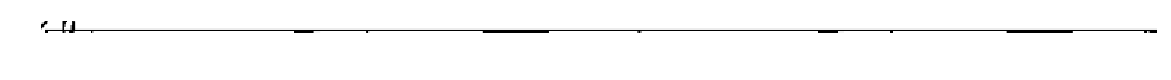

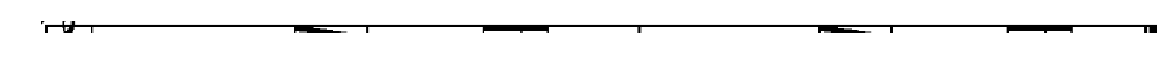

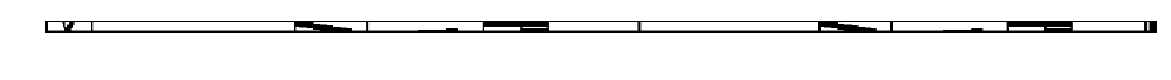

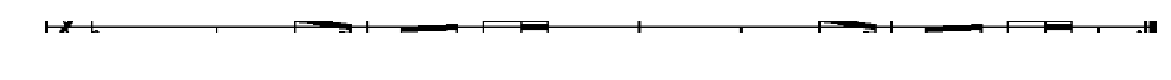

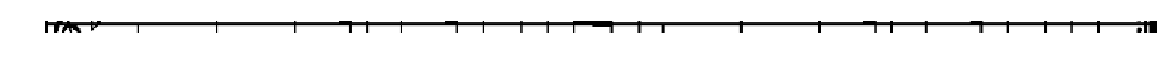

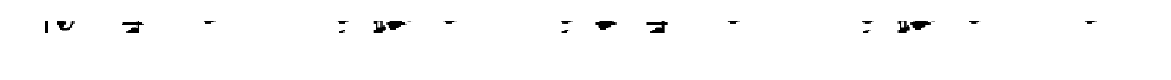

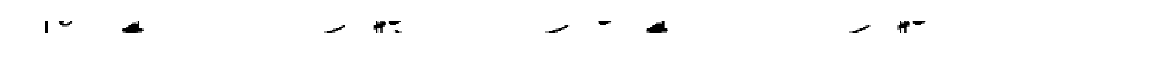

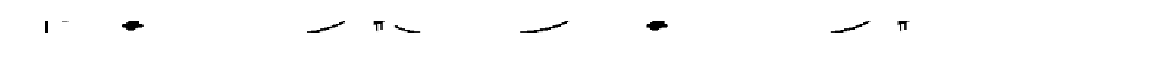

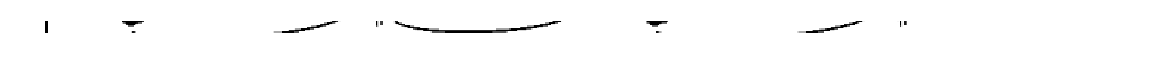

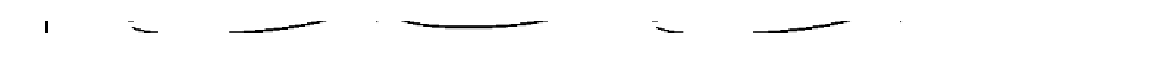

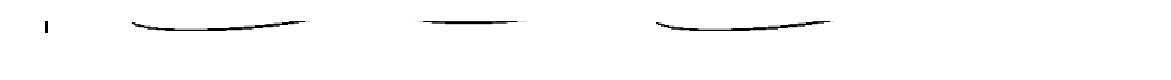

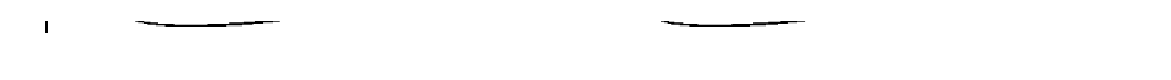

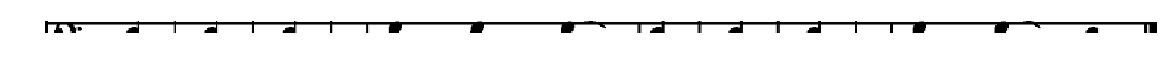

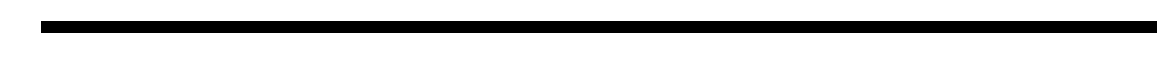

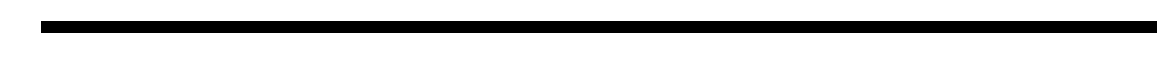

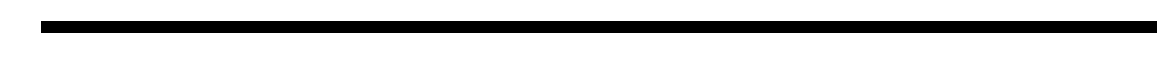

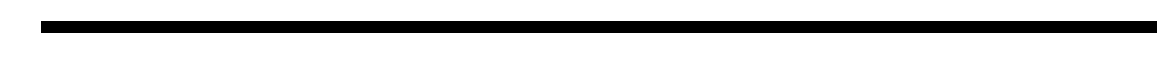

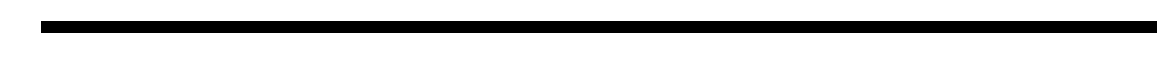

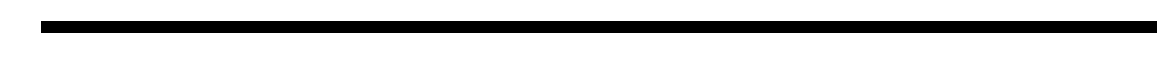

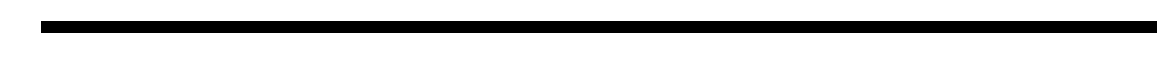

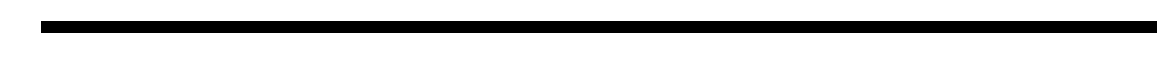

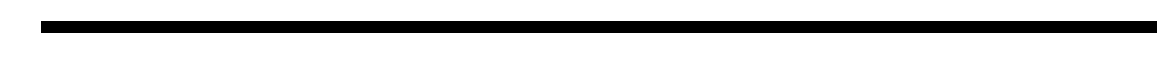

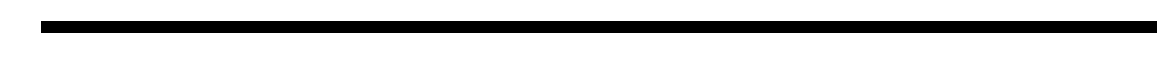

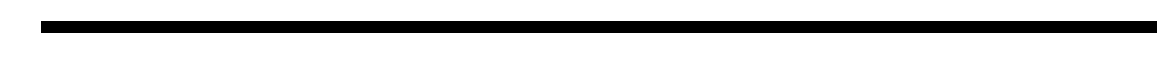

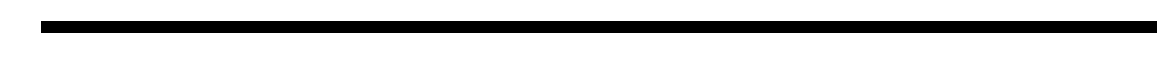

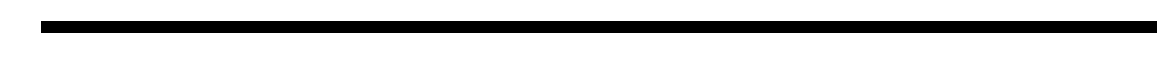

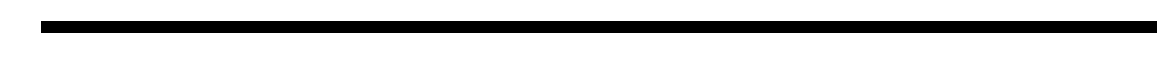

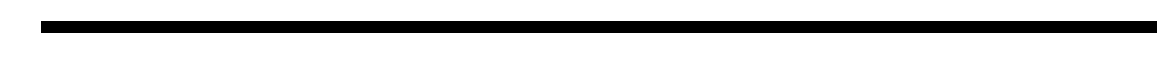

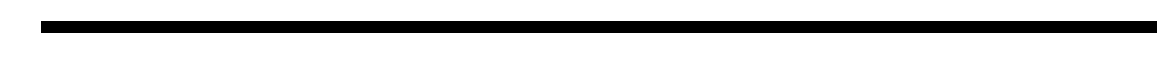

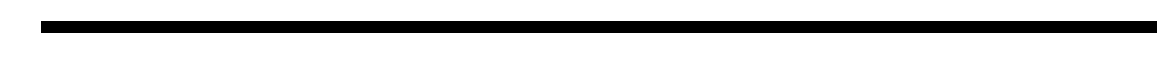

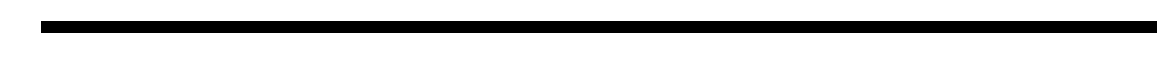

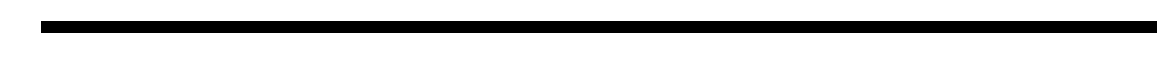

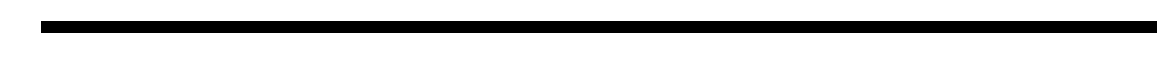

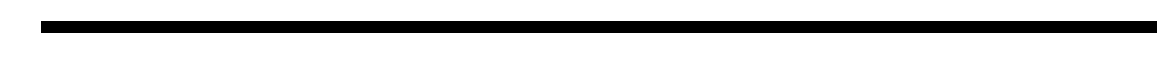

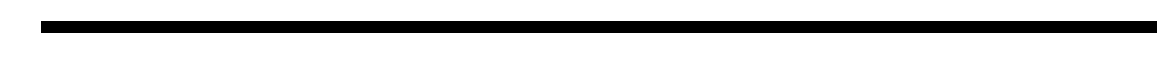

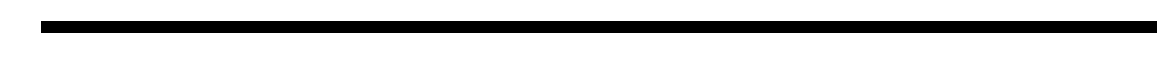

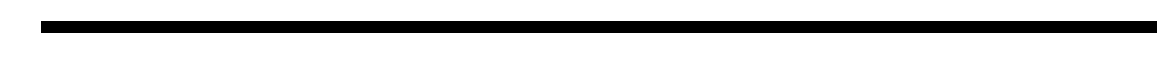

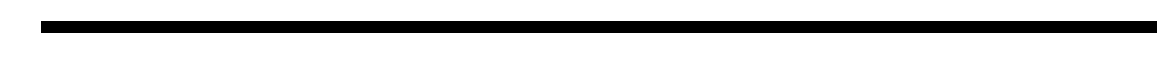

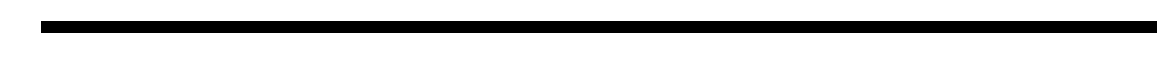

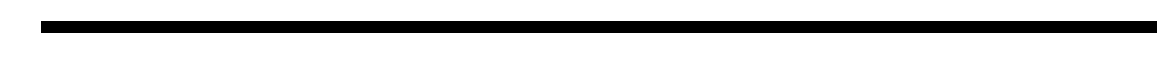

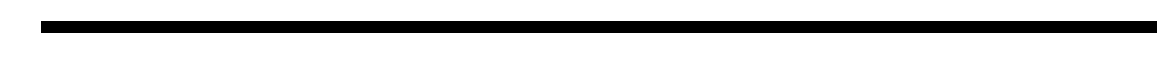

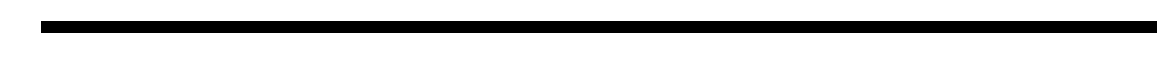

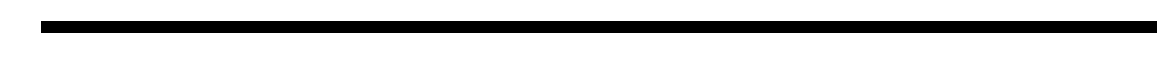

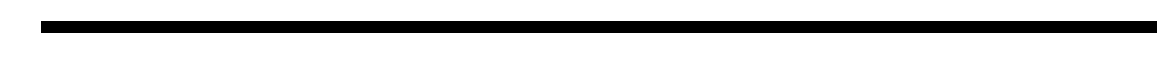

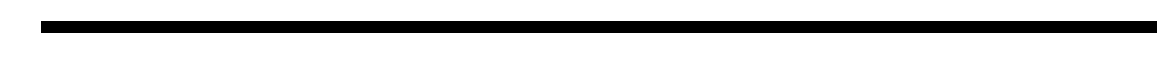

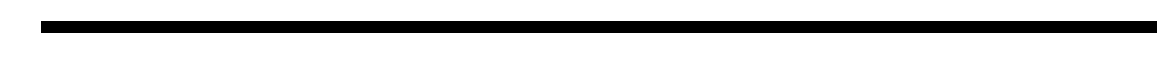

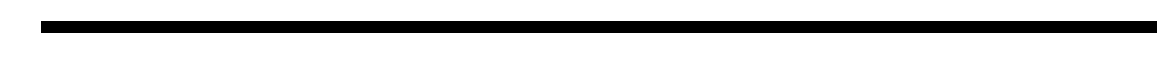

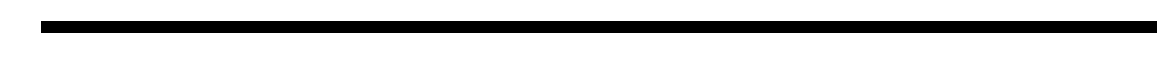

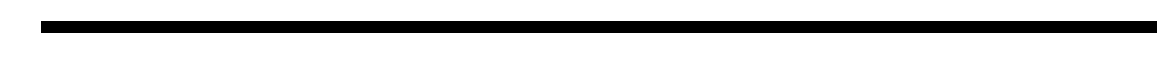

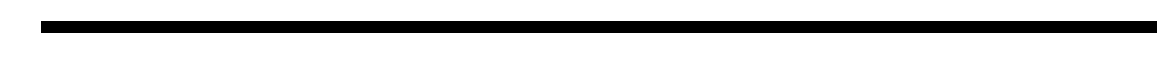

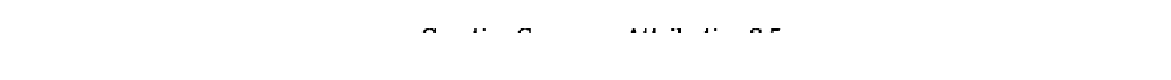

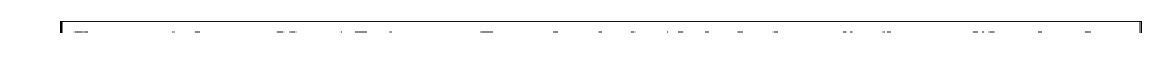

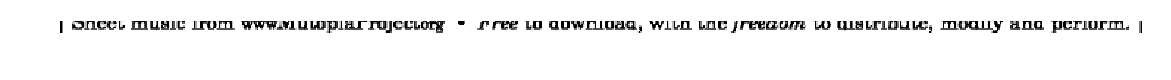

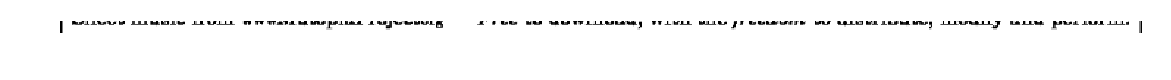

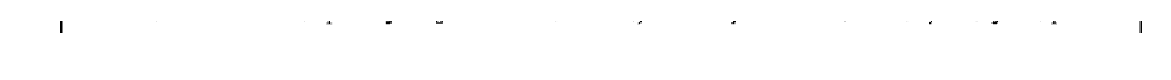

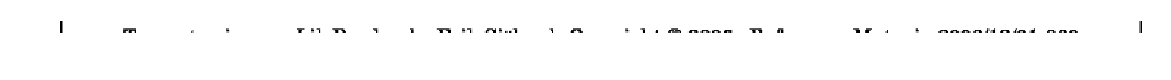

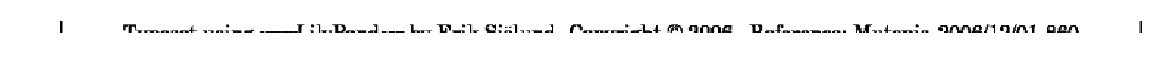

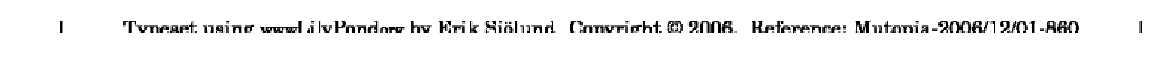

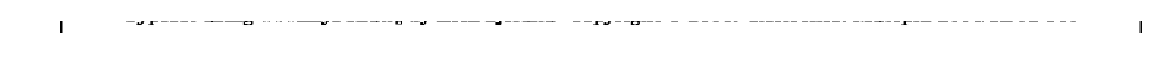

In [68]:
img = images[0]

for sys_mungo in system_mungos:
    t, l, b, r = sys_mungo.bounding_box
    print(t,l,b,r)
    plt.plot([l, r], [t, t], c='g', linewidth=3, alpha=0.5)
    plt.plot([l, r], [b, b], c='g', linewidth=3, alpha=0.5)
    plt.plot([l, l], [t, b], c='g', linewidth=3, alpha=0.5)
    plt.plot([r, r], [t, b], c='g', linewidth=3, alpha=0.5)

# plot noteheads to sheet
x_list = []
for n in notehead_mungos:
    x_list.append(n.middle[0])
    plt.plot(n.middle[1], n.middle[0], "bo", alpha=0.5)
#plt.show()
uq_x = list(set(x_list))
uq_x = sorted(uq_x)

print(uq_x)
width_ave = 0
count=0
for index in range(len(uq_x)-1):
    diff = uq_x[index+1]-uq_x[index]
    if diff<10:
        width_ave+=diff
        count+=1
width_ave = width_ave/count
print(width_ave)
# plot individual straps
top, left, right, bottom = 0,0,0,0
for index in range(len(uq_x)):
    t, l, b, r = system_mungos[0].bounding_box
    t = uq_x[index] - 4
    b = uq_x[index] + 4
    top, left, bottom, right = t,l,b,r
    plt.figure("Strip", figsize=(10,20))
    strip = img[top:bottom, left:right]
    plt.imshow(strip, cmap="gray")
    plt.axis('off')
    plt.show()
    #plt.savefig("strip_" + str(index) + ".jpg")

In [55]:
import os
from PIL import Image
from PyPDF2 import PdfFileReader
piece_list = []
for root, dirs, filenames in os.walk(DATA_ROOT_MSMD):
    for directory in dirs:
        if "_" in directory and "ly" not in directory:
            print("name of directory: " + str(directory))
            piece_list.append(directory)

name of directory: Traditional__traditioner_af_swenska_folk_dansar.3.18__traditioner_af_swenska_folk_dansar.3.18
name of directory: TchaikovskyPI__O37__Tschaikowsky-op37.1
name of directory: BachJS__BWV777__bach-invention-06
name of directory: SchumannR__O15__SchumannOp15No04
name of directory: BachJS__BWVAnh117b__BWV-117b
name of directory: SzervacA__Tritto__Tritto
name of directory: BachJS__BWV800__bwv800
name of directory: BachJS__BWV816__french-suite-5-courante
name of directory: HandelGF__Aylesford__10-menuetii
name of directory: BachJS__BWV829__52title-hub
name of directory: DussekJL__O46__Dussek_Op46_5
name of directory: ChopinFF__O28__Chop-28-21
name of directory: BachJS__BWV814__bach-french-suite-3-menuet
name of directory: SousaJP__KingCotton__KingCotton
name of directory: SatieE__gymnopedie_1__gymnopedie_1
name of directory: BachJS__BWV871__wtk2-prelude2
name of directory: BartokB__rom_folk_dance_1_bartok__rom_folk_dance_1_bartok
name of directory: BachJS__BWV910__bwv910
nam

name of directory: SchumannR__O68__schumann-op68-12-Pere-Fouettard_tempo-1000_ElectricPiano
name of directory: SchumannR__O68__schumann-op68-12-Pere-Fouettard_tempo-1100_YamahaGrandPiano
name of directory: SchumannR__O68__schumann-op68-12-Pere-Fouettard_tempo-950_acoustic_piano_imis_1
name of directory: SchumannR__O68__schumann-op68-12-Pere-Fouettard_tempo-1000_grand-piano-YDP-20160804
name of directory: SchumannR__O68__schumann-op68-12-Pere-Fouettard_tempo-1000_acoustic_piano_imis_1
name of directory: SchumannR__O68__schumann-op68-12-Pere-Fouettard_tempo-1000_YamahaGrandPiano
name of directory: SchumannR__O68__schumann-op68-12-Pere-Fouettard_tempo-1100_ElectricPiano
name of directory: Traditional__traditioner_af_swenska_folk_dansar.1.3__traditioner_af_swenska_folk_dansar.1.3_tempo-950_acoustic_piano_imis_1
name of directory: Traditional__traditioner_af_swenska_folk_dansar.1.3__traditioner_af_swenska_folk_dansar.1.3_tempo-1000_YamahaGrandPiano
name of directory: Traditional__traditione

name of directory: BachJS__BWV1006a__bwv-1006a_1_tempo-1000_grand-piano-YDP-20160804
name of directory: BachJS__BWV1006a__bwv-1006a_1_tempo-1000_ElectricPiano
name of directory: BachJS__BWV1006a__bwv-1006a_1_tempo-1050_ElectricPiano
name of directory: BachJS__BWV1006a__bwv-1006a_1_tempo-1100_acoustic_piano_imis_1
name of directory: BachJS__BWV1006a__bwv-1006a_1_tempo-900_ElectricPiano
name of directory: BachJS__BWV1006a__bwv-1006a_1_tempo-1000_acoustic_piano_imis_1
name of directory: BachJS__BWV1006a__bwv-1006a_1_tempo-950_acoustic_piano_imis_1
name of directory: MozartWA__Anh41__k375g_tempo-1050_ElectricPiano
name of directory: MozartWA__Anh41__k375g_tempo-1100_YamahaGrandPiano
name of directory: MozartWA__Anh41__k375g_tempo-1000_ElectricPiano
name of directory: MozartWA__Anh41__k375g_tempo-950_YamahaGrandPiano
name of directory: MozartWA__Anh41__k375g_tempo-1000_grand-piano-YDP-20160804
name of directory: MozartWA__Anh41__k375g_tempo-1000_YamahaGrandPiano
name of directory: MozartWA_

name of directory: SousaJP__TheStarsAndStripesForever__TheStarsAndStripesForever_tempo-1000_grand-piano-YDP-20160804
name of directory: SousaJP__TheStarsAndStripesForever__TheStarsAndStripesForever_tempo-950_acoustic_piano_imis_1
name of directory: SousaJP__TheStarsAndStripesForever__TheStarsAndStripesForever_tempo-1050_YamahaGrandPiano
name of directory: SousaJP__TheStarsAndStripesForever__TheStarsAndStripesForever_tempo-1100_acoustic_piano_imis_1
name of directory: SousaJP__TheStarsAndStripesForever__TheStarsAndStripesForever_tempo-1000_acoustic_piano_imis_1
name of directory: SousaJP__TheStarsAndStripesForever__TheStarsAndStripesForever_tempo-1000_ElectricPiano
name of directory: SousaJP__TheStarsAndStripesForever__TheStarsAndStripesForever_tempo-900_YamahaGrandPiano
name of directory: LisztF__S.172__liszt-consolation-no4_tempo-900_YamahaGrandPiano
name of directory: LisztF__S.172__liszt-consolation-no4_tempo-900_ElectricPiano
name of directory: LisztF__S.172__liszt-consolation-no4_

name of directory: StraussJJ__O314__blue_danube_tempo-1000_YamahaGrandPiano
name of directory: StraussJJ__O314__blue_danube_tempo-1000_ElectricPiano
name of directory: StraussJJ__O314__blue_danube_tempo-900_YamahaGrandPiano
name of directory: StraussJJ__O314__blue_danube_tempo-1050_ElectricPiano
name of directory: StraussJJ__O314__blue_danube_tempo-1000_acoustic_piano_imis_1
name of directory: StraussJJ__O314__blue_danube_tempo-1000_grand-piano-YDP-20160804
name of directory: StraussJJ__O314__blue_danube_tempo-900_ElectricPiano
name of directory: HandelGF__Aylesford__02-entree_tempo-950_YamahaGrandPiano
name of directory: HandelGF__Aylesford__02-entree_tempo-1000_grand-piano-YDP-20160804
name of directory: HandelGF__Aylesford__02-entree_tempo-900_YamahaGrandPiano
name of directory: HandelGF__Aylesford__02-entree_tempo-1000_YamahaGrandPiano
name of directory: HandelGF__Aylesford__02-entree_tempo-900_ElectricPiano
name of directory: HandelGF__Aylesford__02-entree_tempo-1000_ElectricPiano

In [66]:
pieces = []

for root, dirs, filenames in os.walk(DATA_ROOT_MSMD):
    for directory in dirs:
        print("directory name: " + str(directory))
        pieces.append(directory)
    break

directory name: Traditional__traditioner_af_swenska_folk_dansar.3.18__traditioner_af_swenska_folk_dansar.3.18
directory name: TchaikovskyPI__O37__Tschaikowsky-op37.1
directory name: BachJS__BWV777__bach-invention-06
directory name: SchumannR__O15__SchumannOp15No04
directory name: BachJS__BWVAnh117b__BWV-117b
directory name: SzervacA__Tritto__Tritto
directory name: BachJS__BWV800__bwv800
directory name: BachJS__BWV816__french-suite-5-courante
directory name: HandelGF__Aylesford__10-menuetii
directory name: BachJS__BWV829__52title-hub
directory name: DussekJL__O46__Dussek_Op46_5
directory name: ChopinFF__O28__Chop-28-21
directory name: BachJS__BWV814__bach-french-suite-3-menuet
directory name: SousaJP__KingCotton__KingCotton
directory name: SatieE__gymnopedie_1__gymnopedie_1
directory name: BachJS__BWV871__wtk2-prelude2
directory name: BartokB__rom_folk_dance_1_bartok__rom_folk_dance_1_bartok
directory name: BachJS__BWV910__bwv910
directory name: HandelGF__Aylesford__14-menueti
directory

In [67]:
for piece_name in pieces:
    piece = Piece(root=DATA_ROOT_MSMD, name=piece_name)

    if piece.available_scores:
        score = piece.load_score(piece.available_scores[0])
    else:
        continue
    
#     mungos = score.load_mungos()
#     mdict = {m.objid: m for m in mungos}
#     mungos_per_page = score.load_mungos(by_page=True)
    images = score.load_images()
    
    for image in images:
        print("shape of image: " + str(image.shape))

shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (118

shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (118

shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (118

shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1080, 835)
shape of image: (1080, 835)
shape of image: (1080, 835)
shape of image: (1080, 835)
shape of image: (1080, 835)
shape of image: (1080, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (118

shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (118

shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (118

shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (118

48 36 158 796
203 37 318 796
363 37 496 796
541 36 651 796
696 36 804 796
849 36 981 796
1026 36 1133 796
---- x/y dict ----
{81: [613, 760, 687, 646, 702, 204, 347, 380], 84: [480, 773, 745, 366], 87: [594, 493, 535, 112, 206, 439, 466], 90: [581, 616, 507, 553, 661, 453], 93: [567, 629, 520, 690, 257, 116, 204], 96: [731, 648, 231, 319, 440, 406], 99: [493, 553, 745, 785, 714, 284, 329, 155], 133: [507, 535, 244], 136: [629, 520, 661, 230, 257, 204, 299, 366], 139: [480, 773, 745, 646, 217, 317, 270, 173, 421, 380, 347], 142: [594, 493, 284, 155, 439, 393, 466, 332], 145: [581, 613, 141, 406, 453], 148: [567, 714, 112], 166: [553], 169: [688, 126], 237: [209, 110, 169, 143, 307], 240: [627, 182, 228, 277, 130, 320], 243: [685, 195, 234, 114, 346], 246: [247, 401, 431, 460], 249: [575, 486, 517, 260], 252: [630, 601, 503, 688, 280], 254: [614, 740, 740, 155, 372, 292], 290: [614, 486, 557, 517, 640, 363, 460, 418, 307], 293: [575, 627, 601, 473, 530, 768, 740, 277, 401, 431], 296: [58

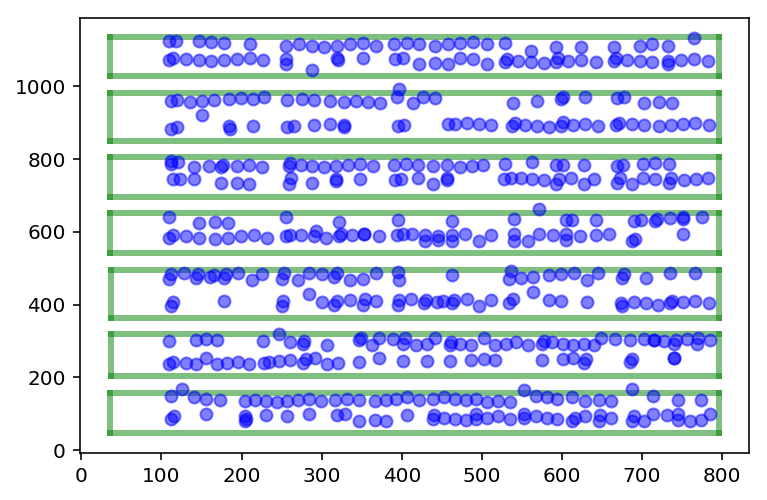

In [84]:
img = images[1]

for sys_mungo in system_mungos:
    t, l, b, r = sys_mungo.bounding_box
    print(t,l,b,r)
    plt.plot([l, r], [t, t], c='g', linewidth=3, alpha=0.5)
    plt.plot([l, r], [b, b], c='g', linewidth=3, alpha=0.5)
    plt.plot([l, l], [t, b], c='g', linewidth=3, alpha=0.5)
    plt.plot([r, r], [t, b], c='g', linewidth=3, alpha=0.5)

# plot noteheads to sheet
y_list = []
for n in notehead_mungos:
    y_list.append(n.middle[0])
    plt.plot(n.middle[1], n.middle[0], "bo", alpha=0.5)
#plt.show()
uq_y = list(set(y_list))
uq_y = sorted(uq_y)

assoc_x = {}
for y in uq_y:
    if y not in assoc_x.keys():
        assoc_x[y] = []
    for n in notehead_mungos:
        if n.middle[0] == y:
            assoc_x[y].append(n.middle[1]) # add associated x position on this strip
            
print("---- x/y dict ----")
print(assoc_x)


In [85]:
top, left, right, bottom = 0,0,0,0
for index in range(len(uq_y)):
    t, l, b, r = system_mungos[0].bounding_box
    t = uq_y[index] - 4
    b = uq_y[index] + 4
    top, left, bottom, right = t,l,b,r
#     plt.figure("Strip", figsize=(10,20))
    strip = img[top:bottom, left:right]
    
    # create new x values by subtracting off left from all x vals in dict
    curr_vals = assoc_x[uq_y[index]]
    for idx in range(len(curr_vals)):
        assoc_x[uq_y[index]][idx] -= l # adjust x values so that they show up in the right place on strip
        
#     plt.imshow(strip, cmap="gray")
#     plt.axis('off')
#     plt.show()
    #plt.savefig("strip_" + str(index) + ".jpg")
print("new dict")
print(assoc_x)

new dict
{81: [577, 724, 651, 610, 666, 168, 311, 344], 84: [444, 737, 709, 330], 87: [558, 457, 499, 76, 170, 403, 430], 90: [545, 580, 471, 517, 625, 417], 93: [531, 593, 484, 654, 221, 80, 168], 96: [695, 612, 195, 283, 404, 370], 99: [457, 517, 709, 749, 678, 248, 293, 119], 133: [471, 499, 208], 136: [593, 484, 625, 194, 221, 168, 263, 330], 139: [444, 737, 709, 610, 181, 281, 234, 137, 385, 344, 311], 142: [558, 457, 248, 119, 403, 357, 430, 296], 145: [545, 577, 105, 370, 417], 148: [531, 678, 76], 166: [517], 169: [652, 90], 237: [173, 74, 133, 107, 271], 240: [591, 146, 192, 241, 94, 284], 243: [649, 159, 198, 78, 310], 246: [211, 365, 395, 424], 249: [539, 450, 481, 224], 252: [594, 565, 467, 652, 244], 254: [578, 704, 704, 119, 336, 256], 290: [578, 450, 521, 481, 604, 327, 424, 382, 271], 293: [539, 591, 565, 437, 494, 732, 704, 241, 365, 395], 296: [552, 507, 224, 426], 299: [541, 692, 191, 242, 74], 302: [707, 749, 649, 679, 679, 133, 107, 310], 305: [720, 630, 666, 119, 

In [86]:
len(uq_y)

110

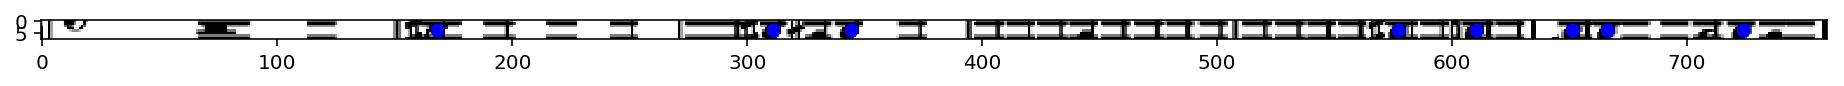

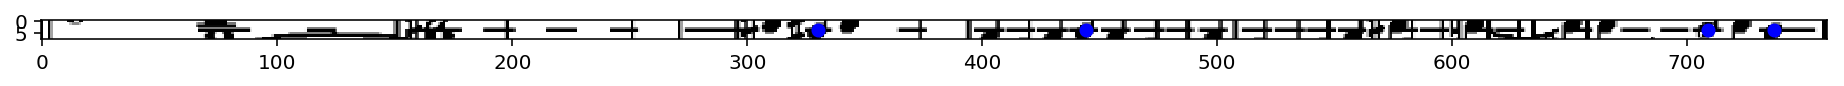

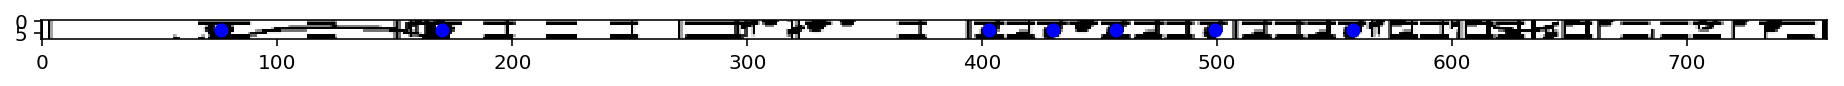

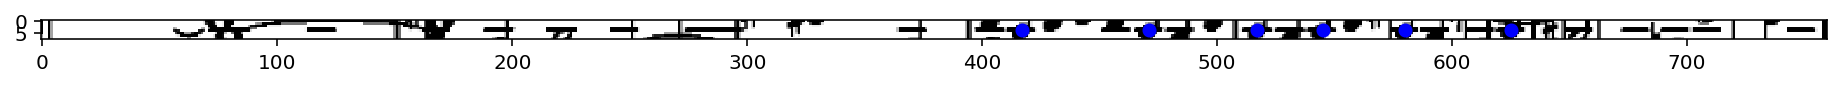

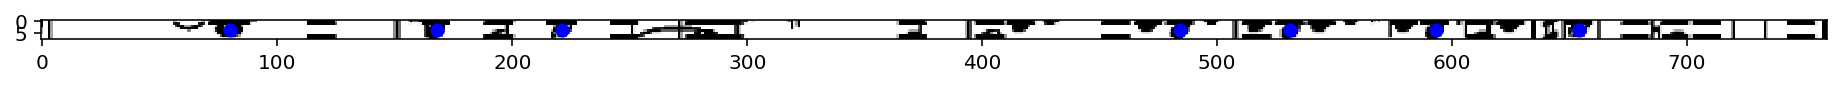

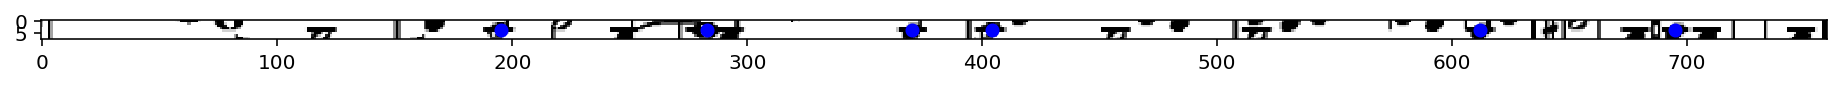

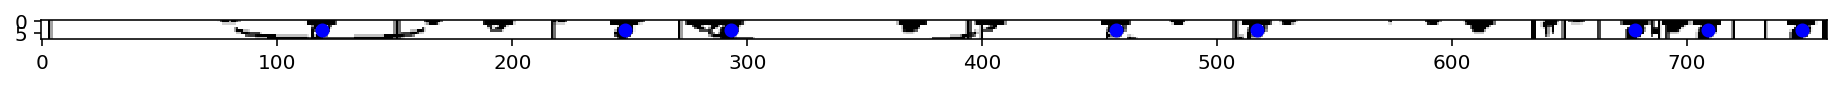

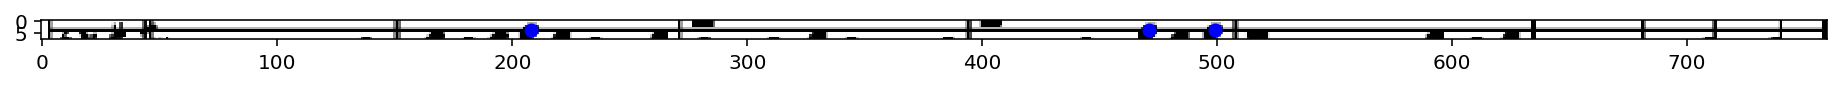

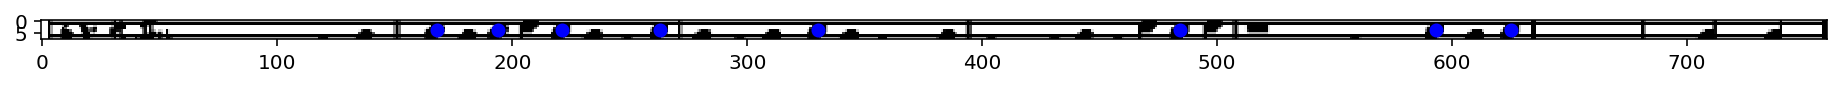

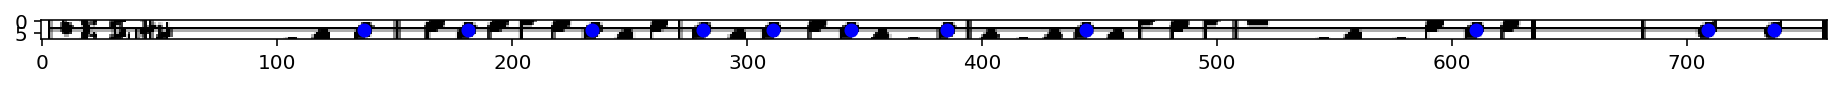

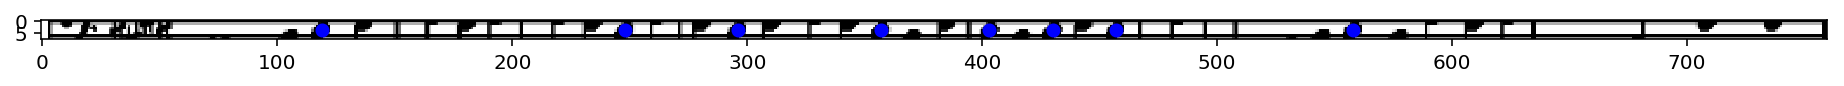

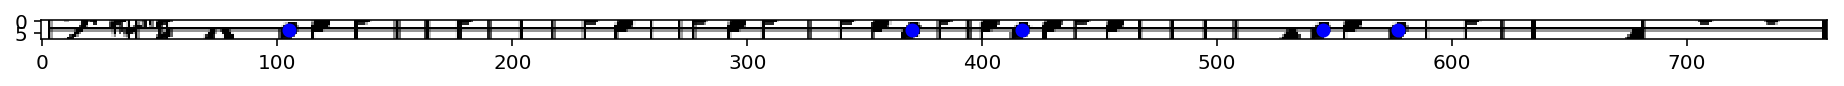

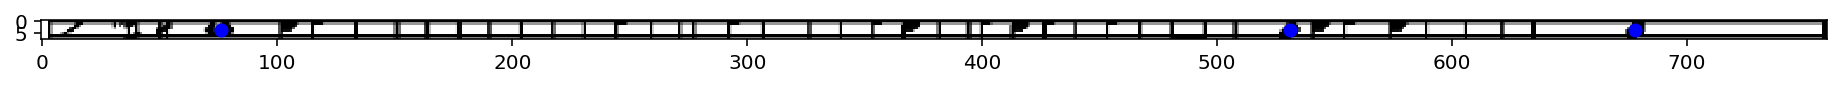

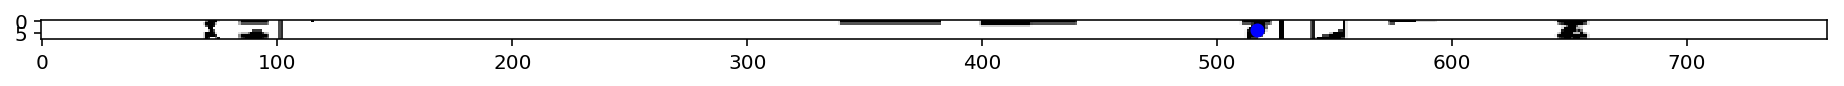

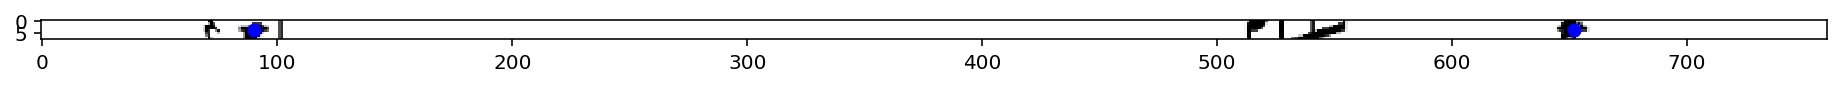

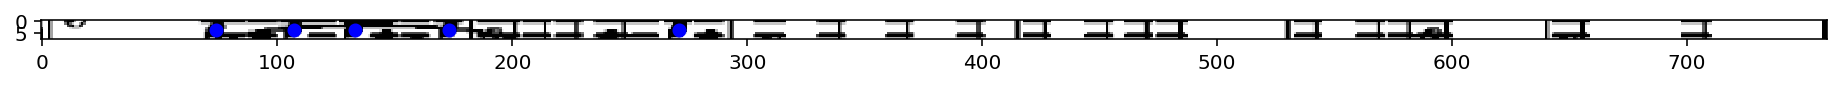

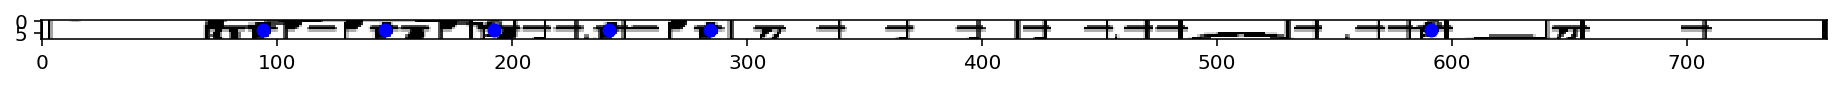

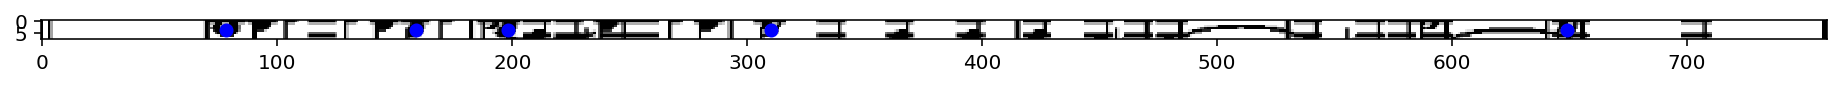

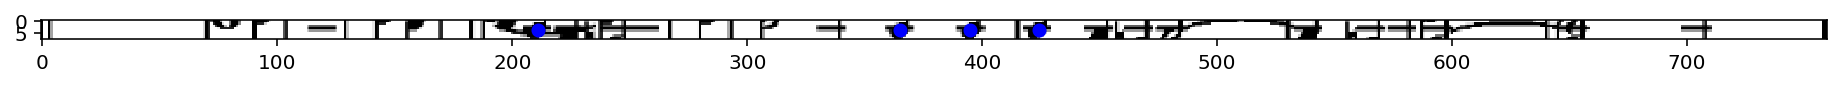

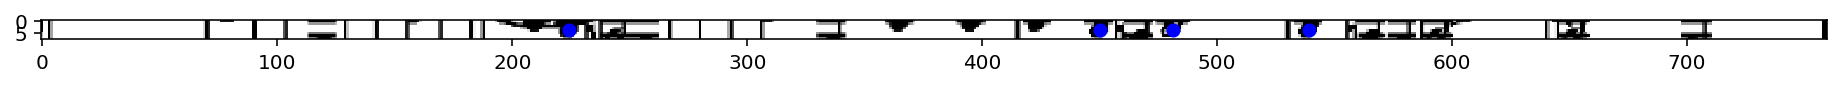

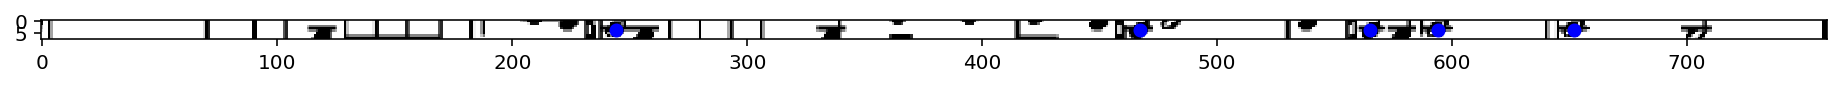

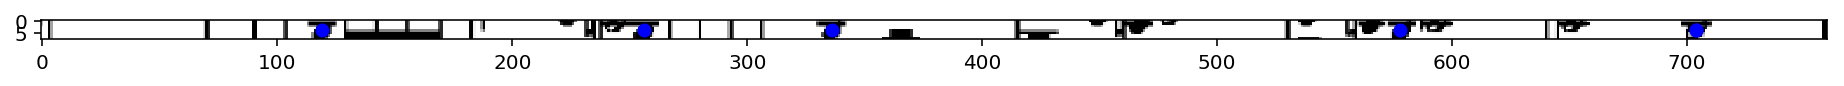

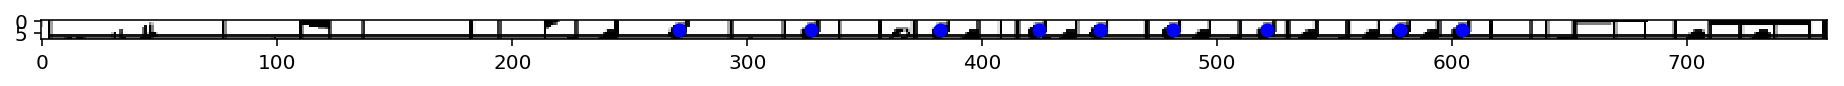

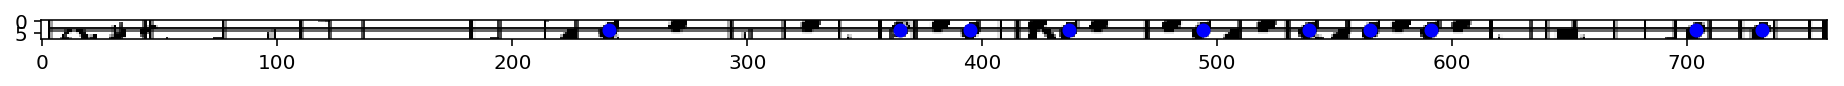

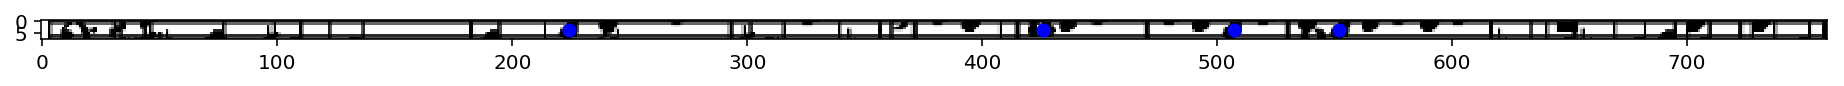

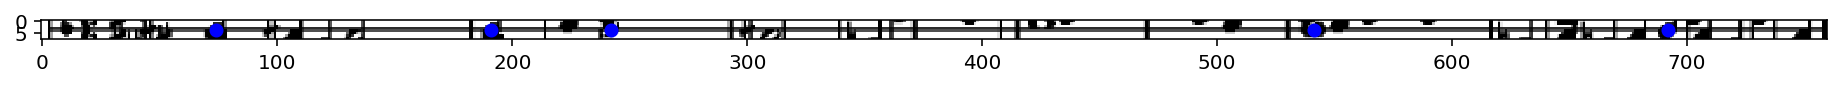

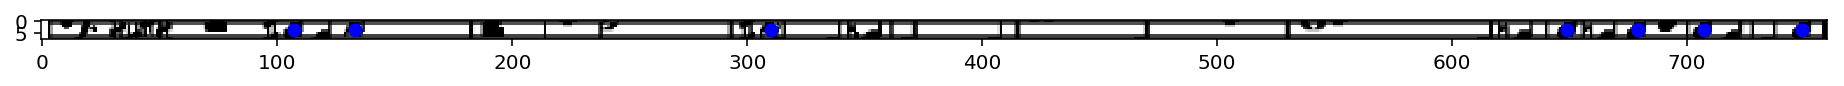

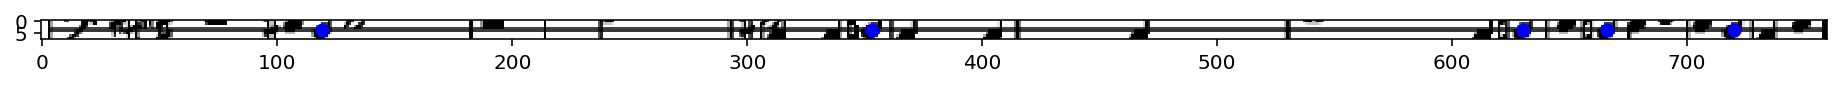

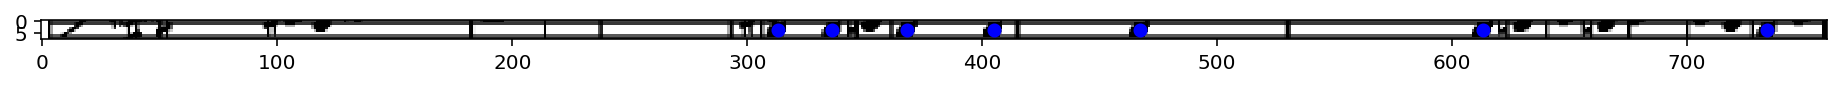

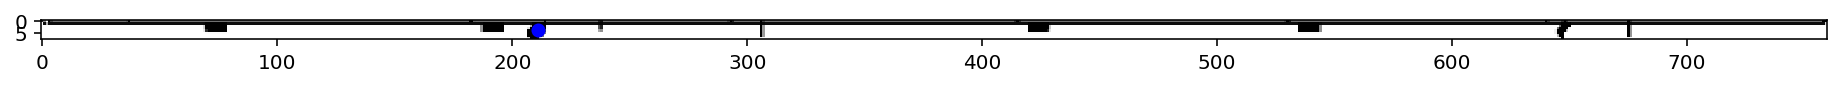

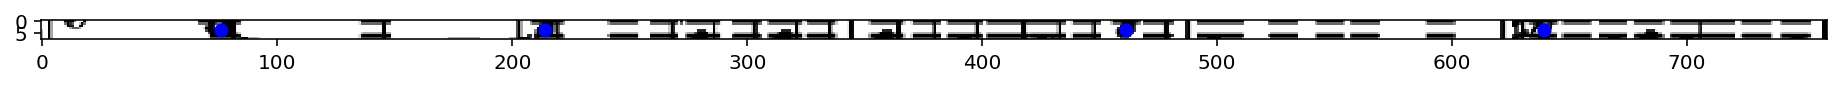

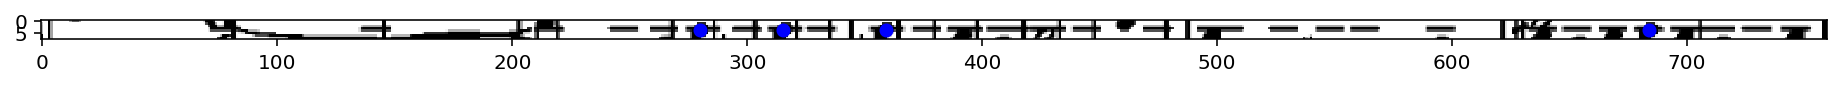

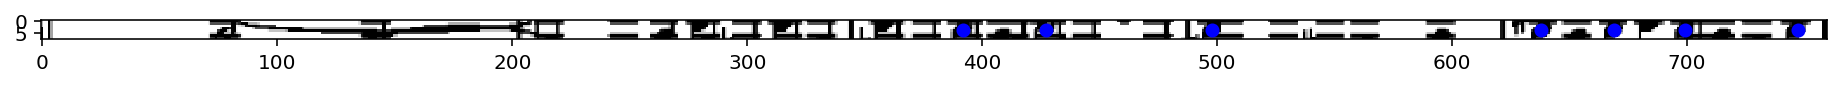

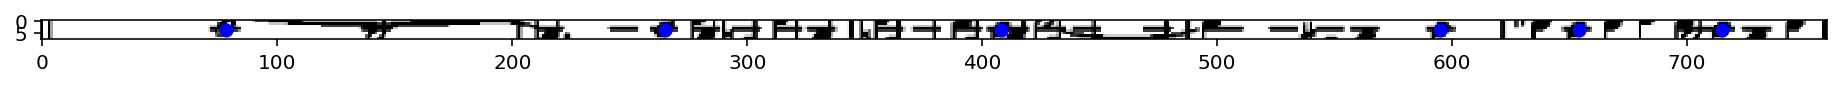

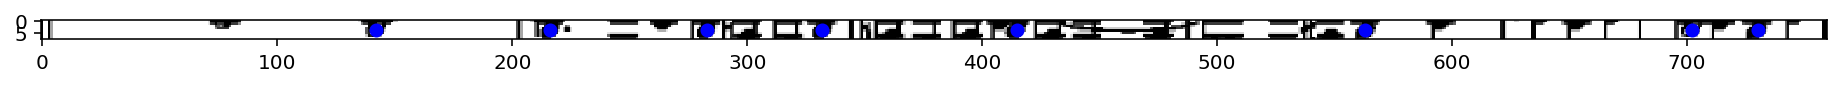

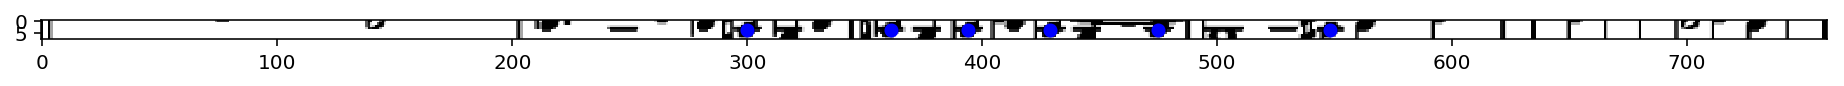

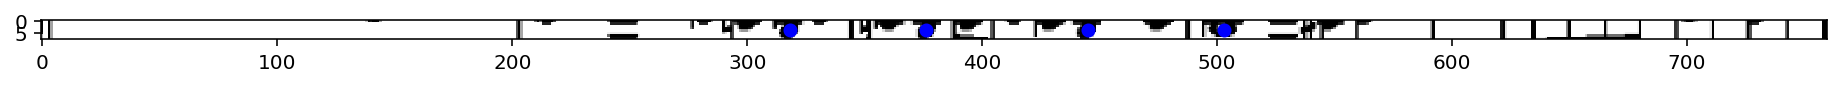

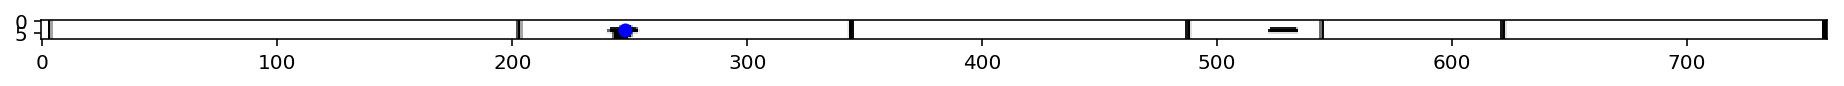

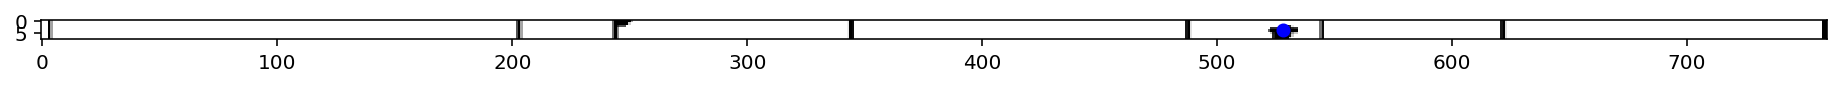

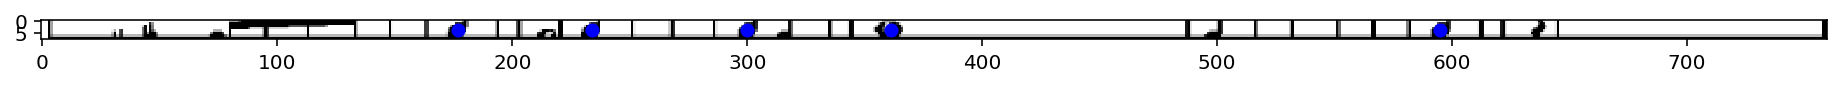

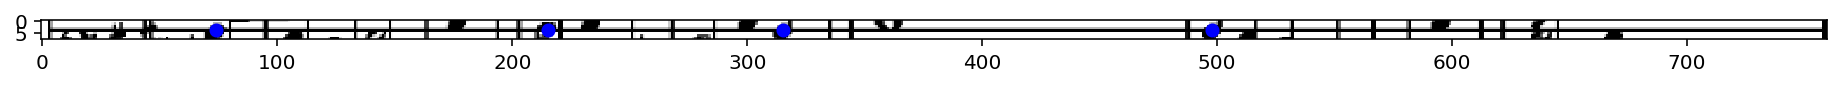

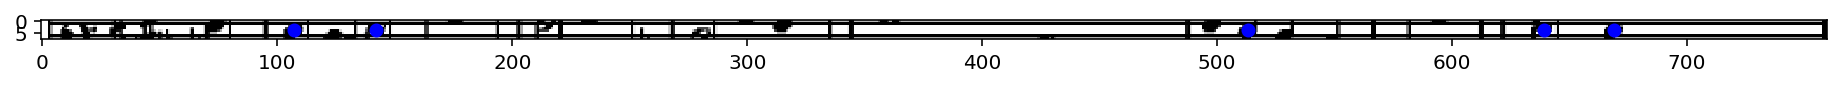

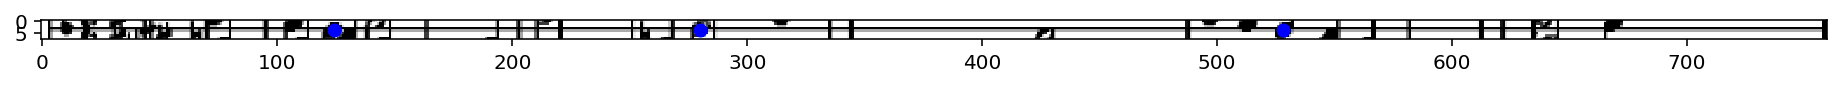

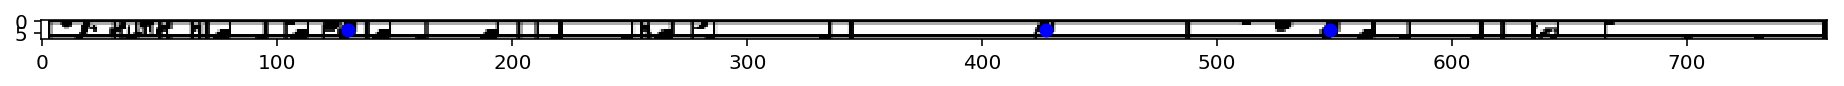

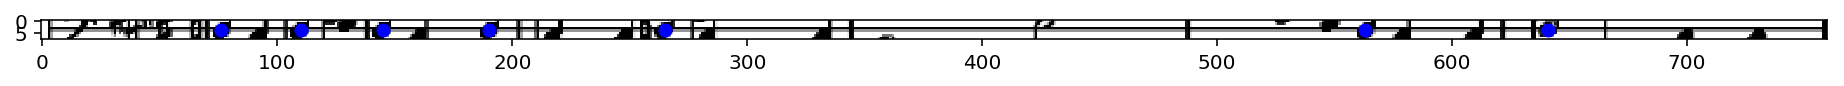

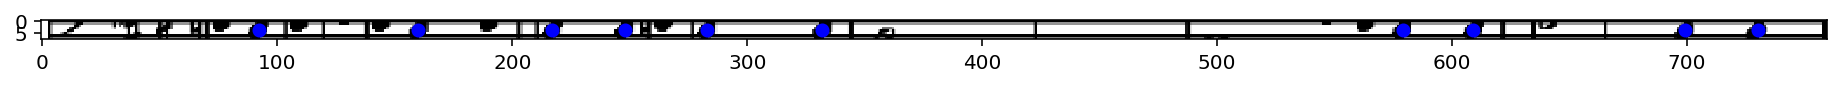

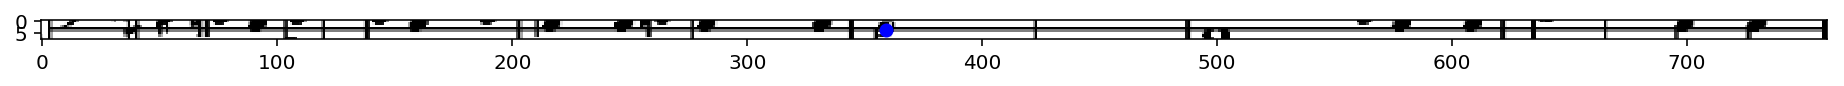

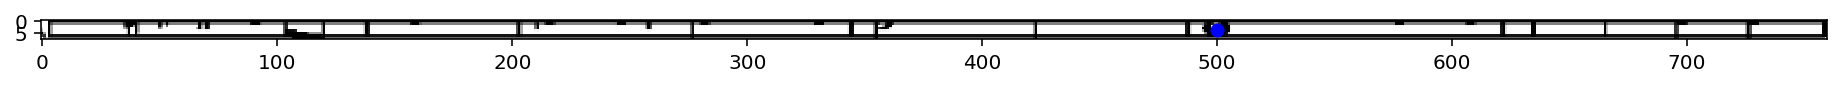

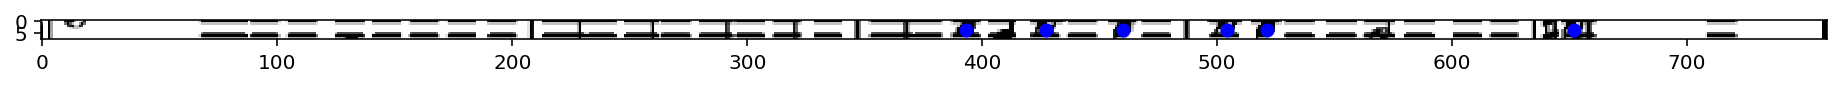

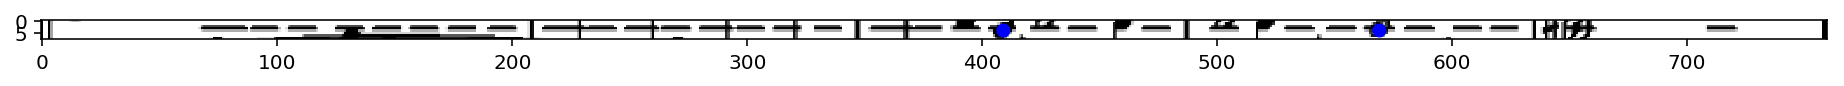

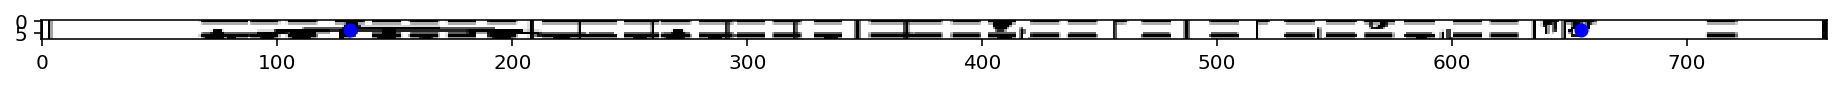

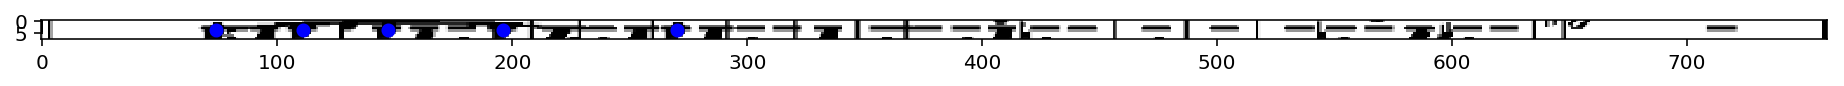

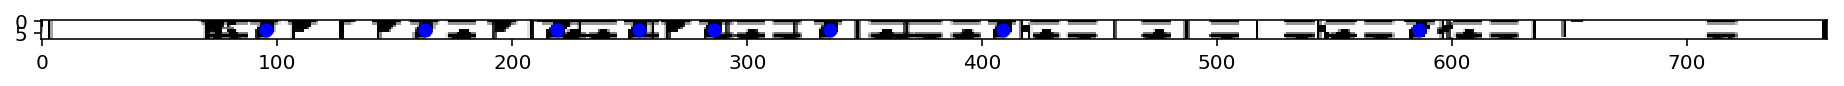

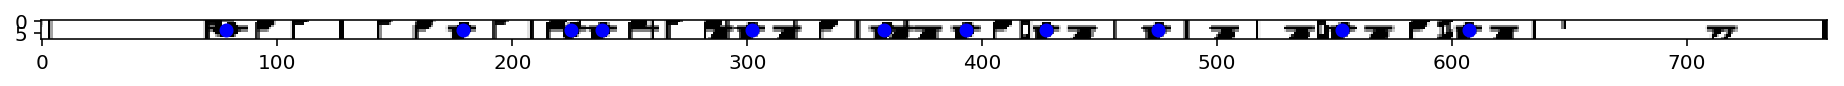

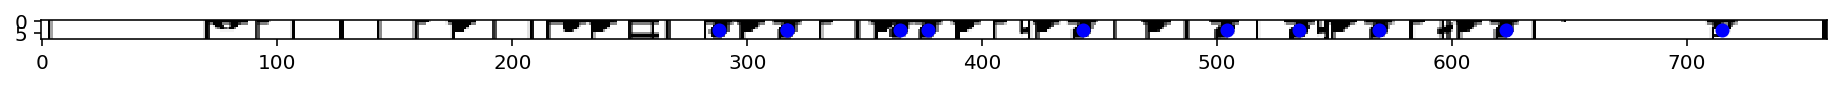

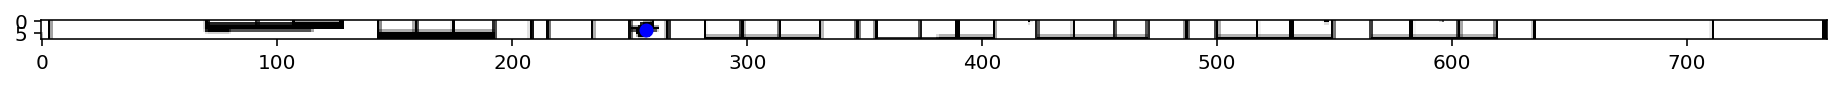

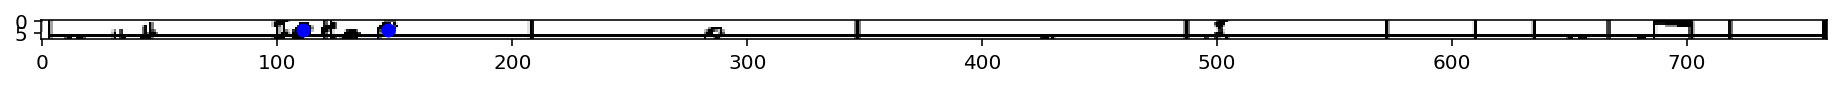

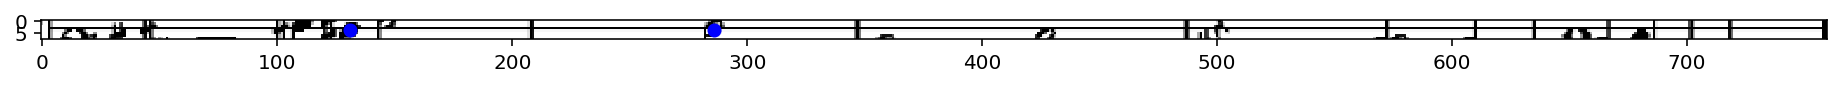

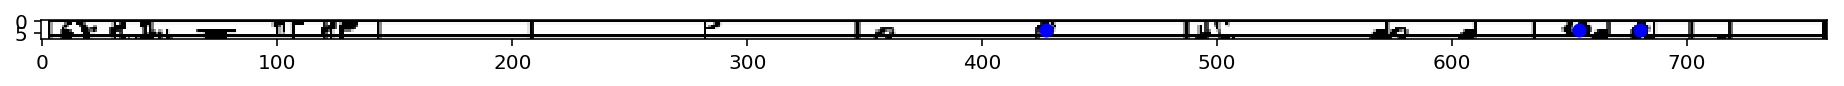

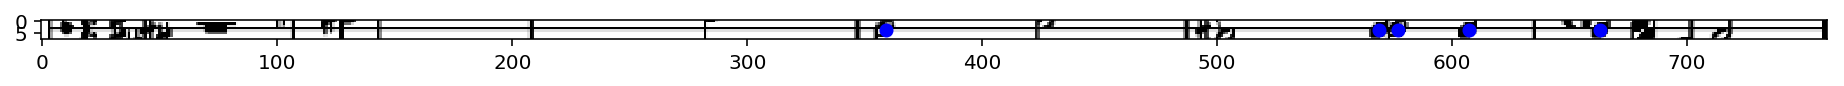

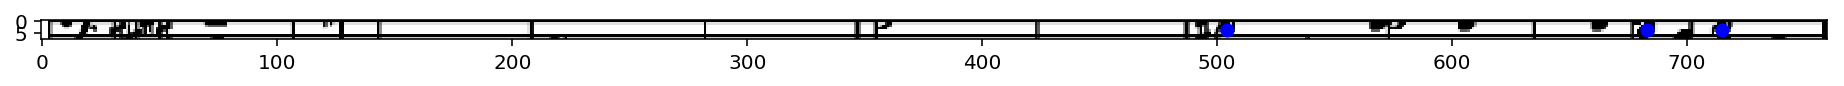

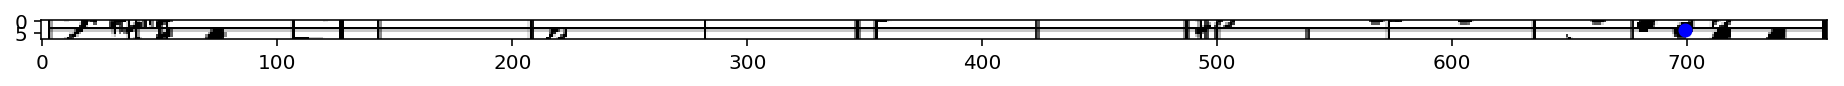

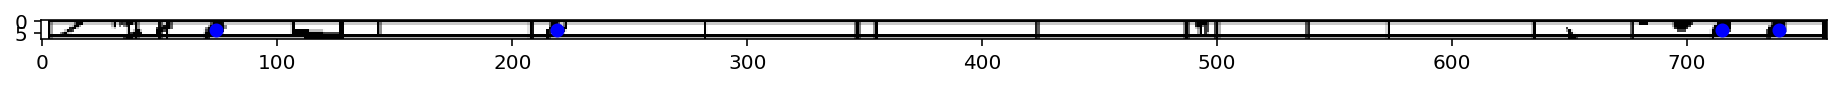

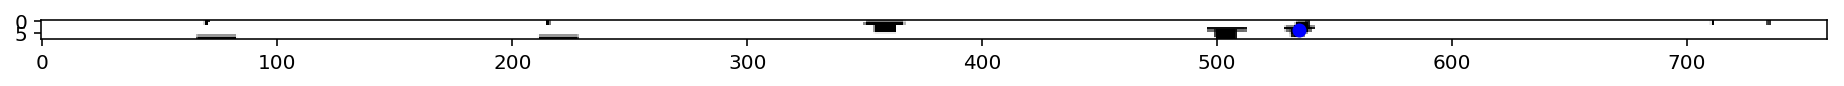

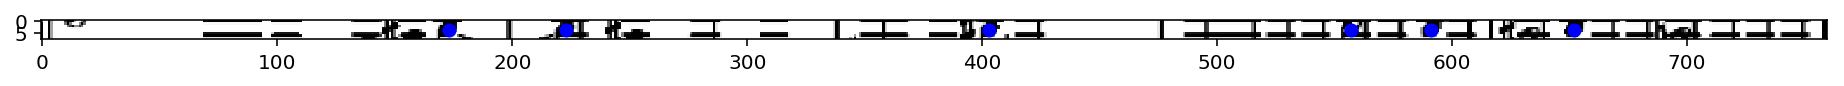

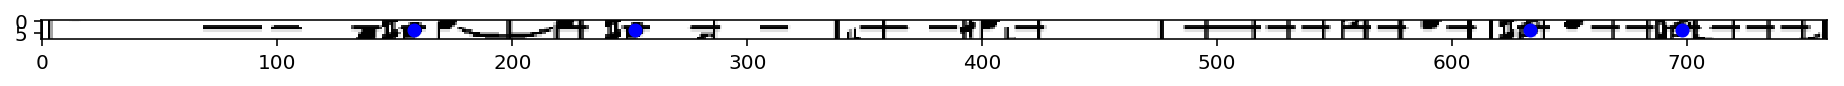

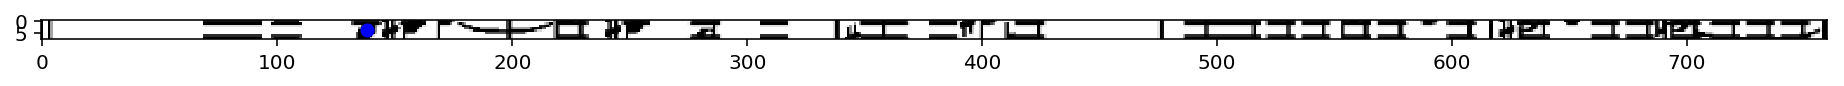

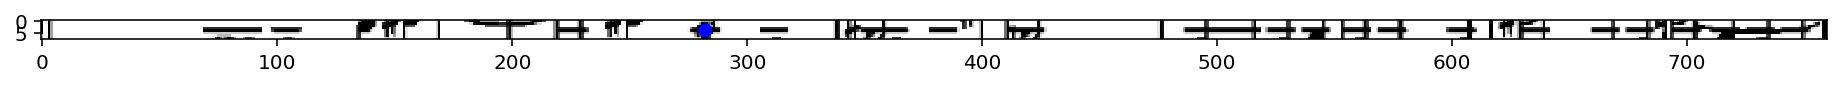

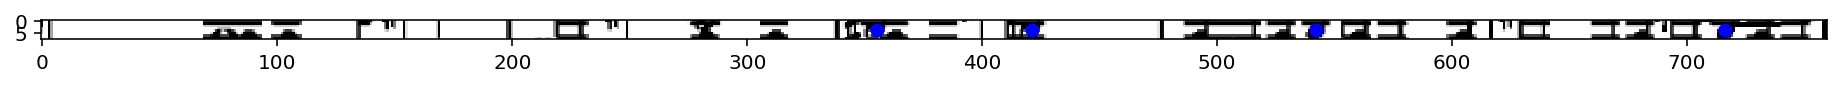

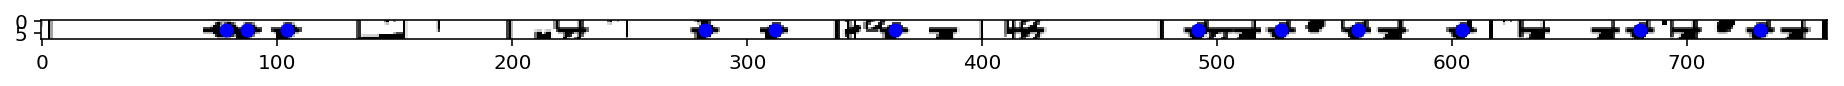

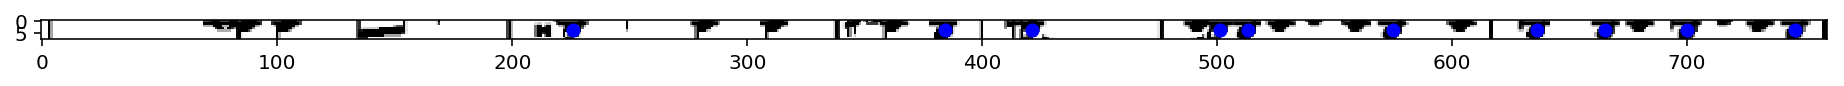

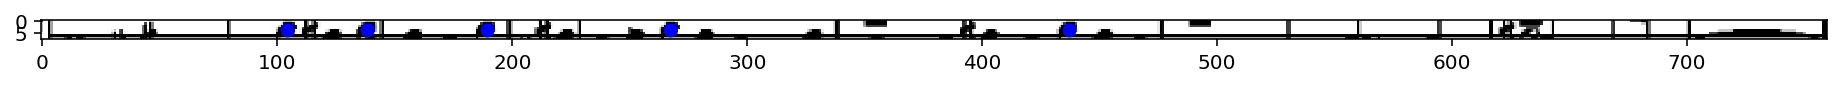

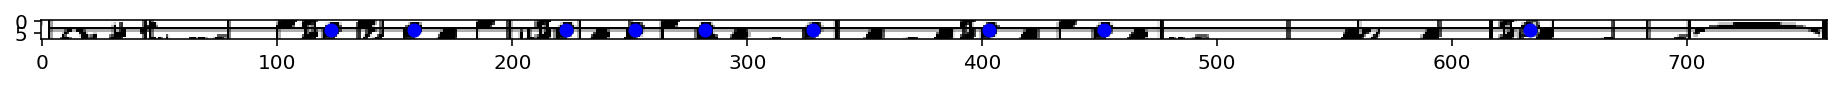

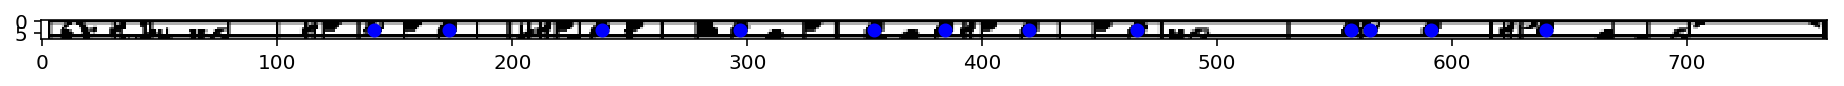

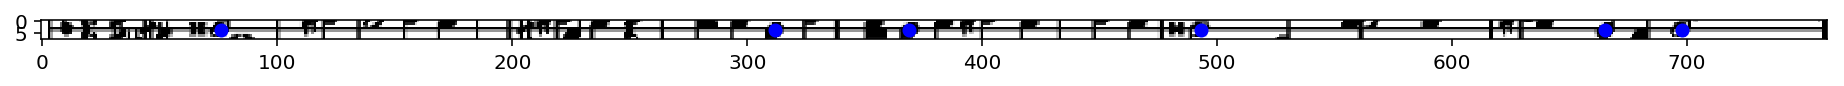

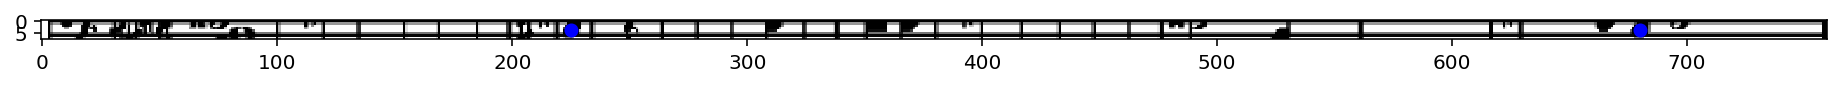

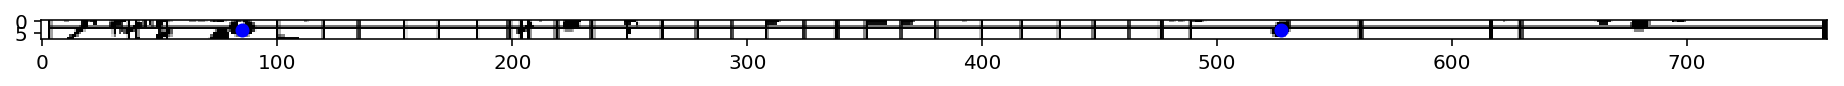

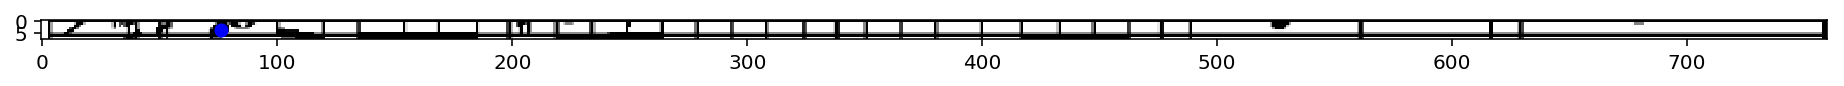

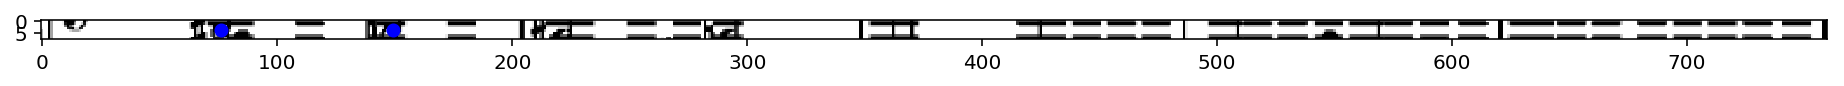

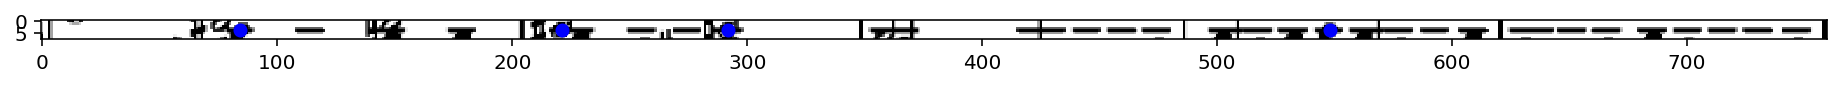

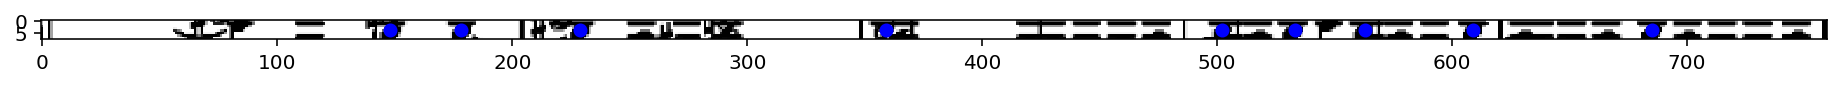

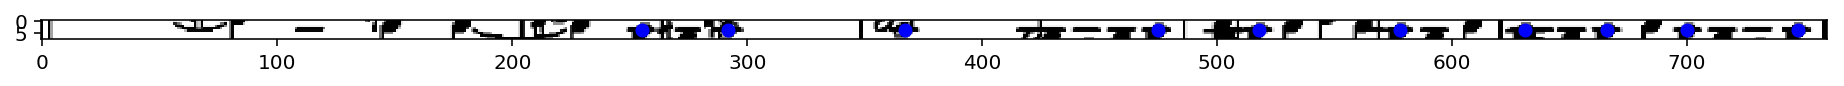

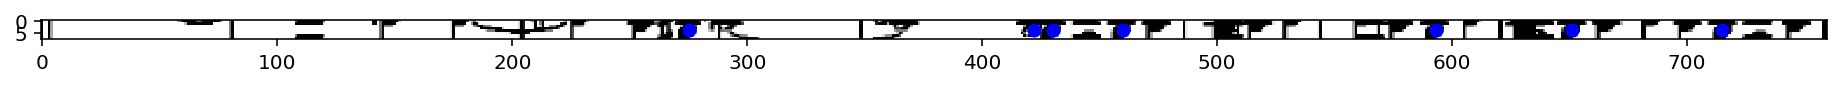

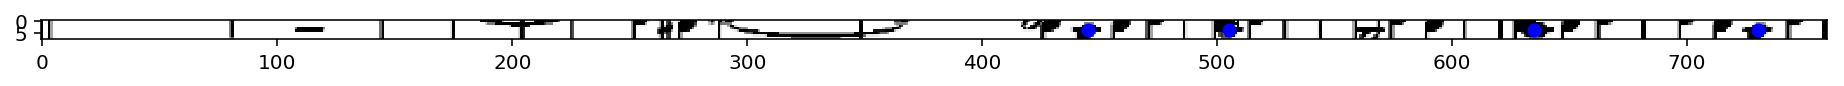

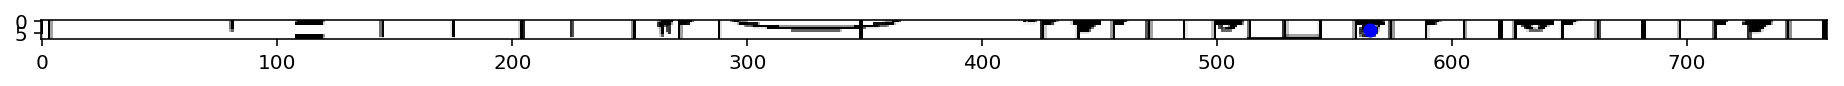

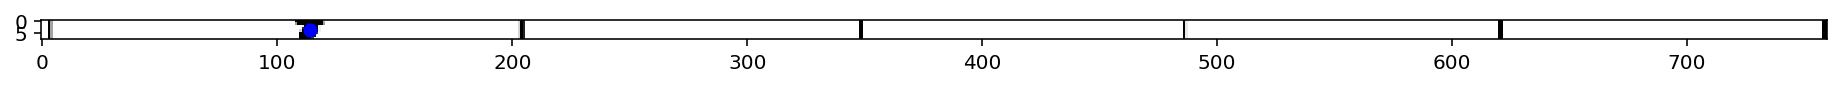

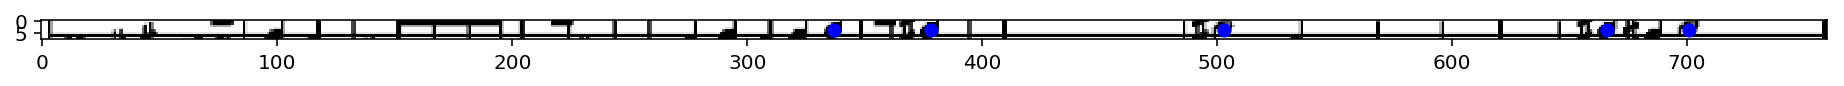

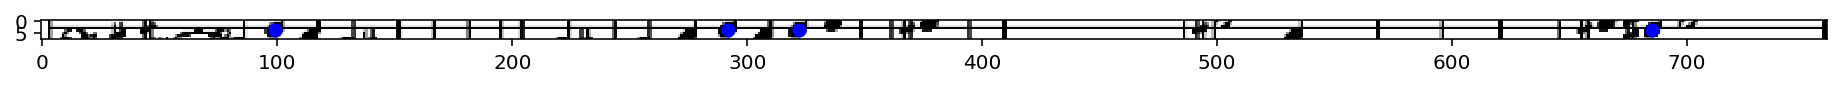

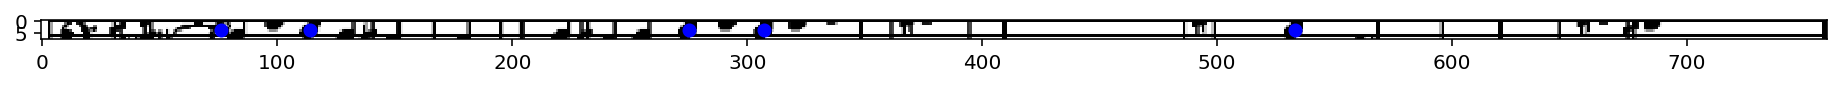

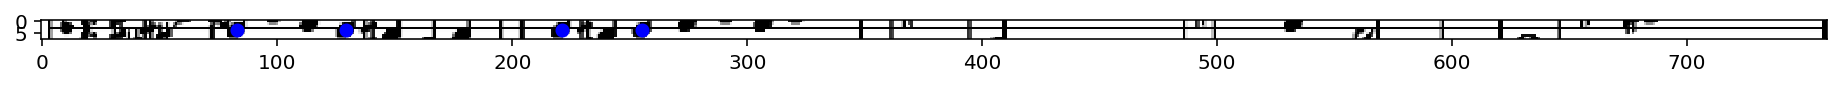

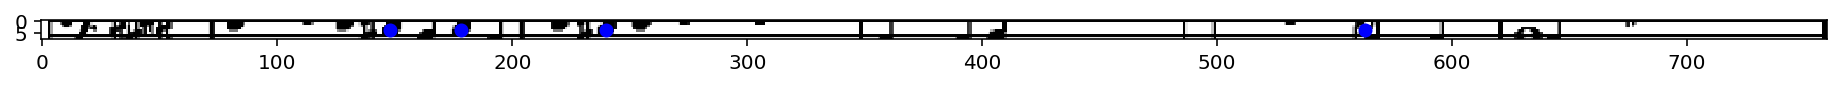

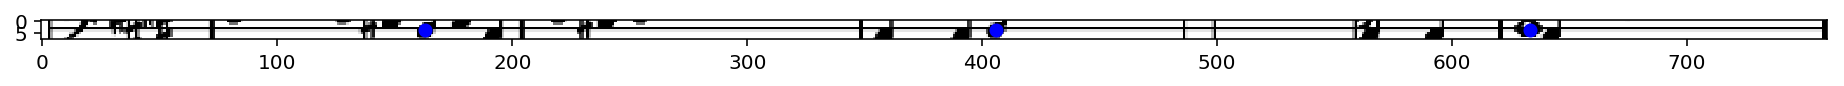

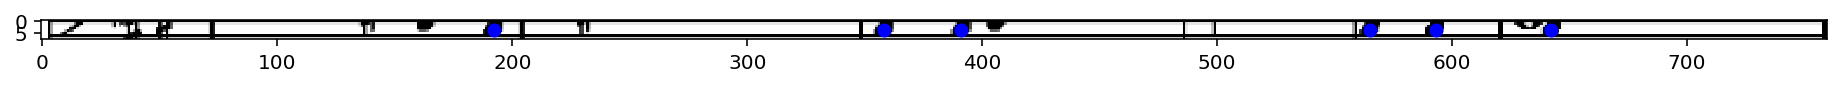

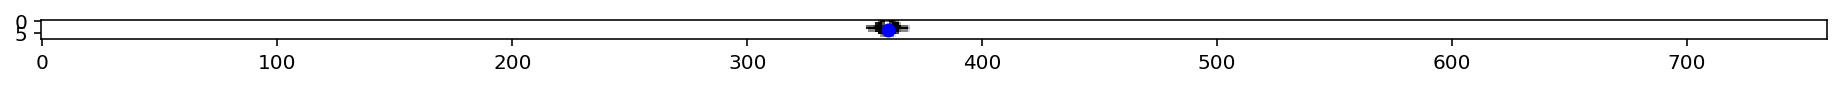

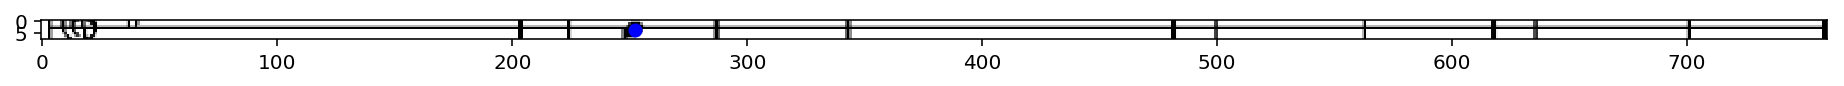

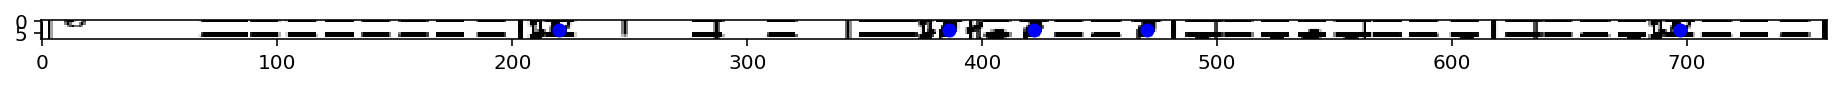

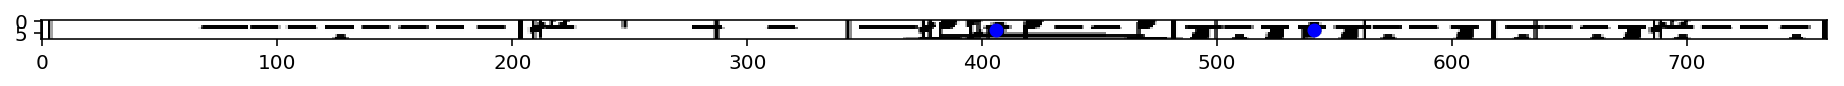

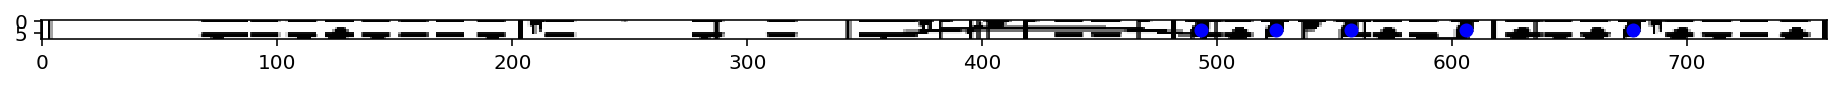

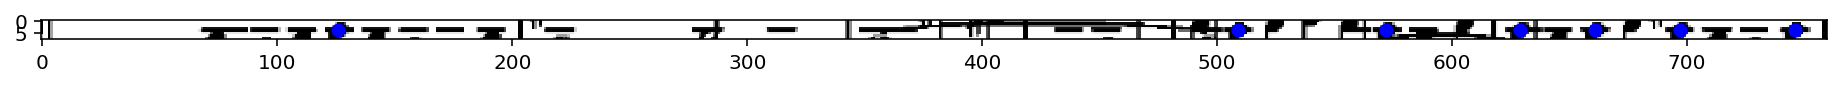

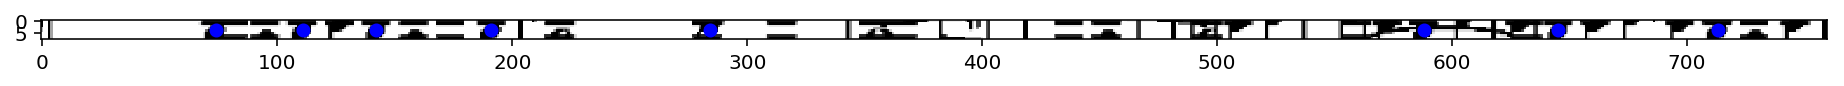

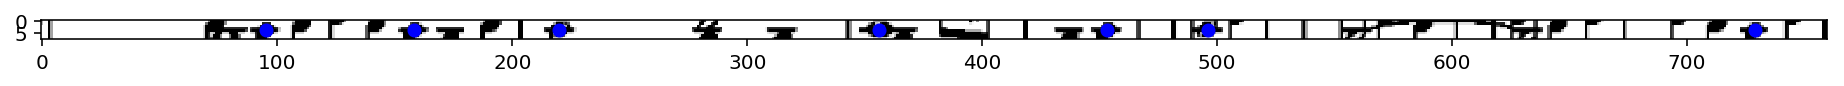

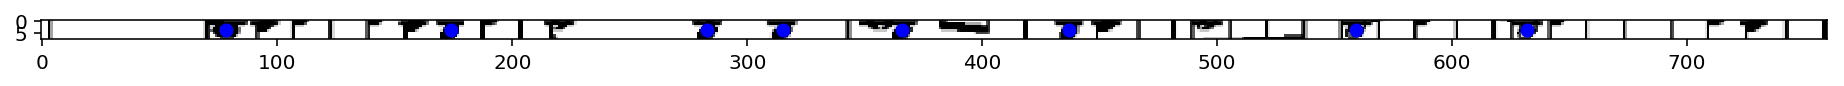

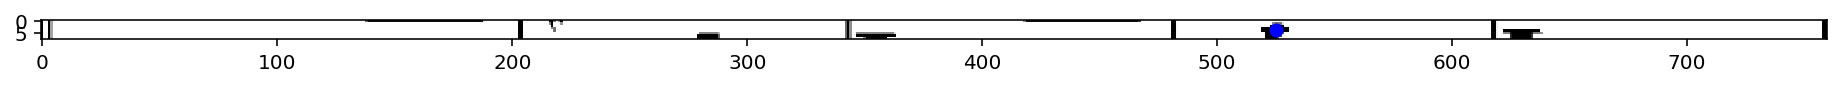

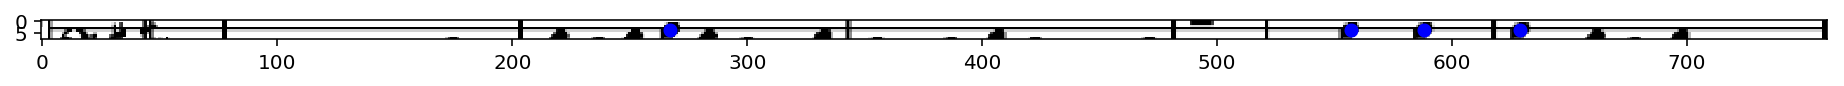

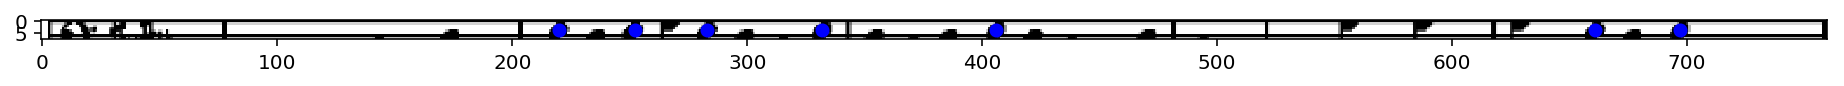

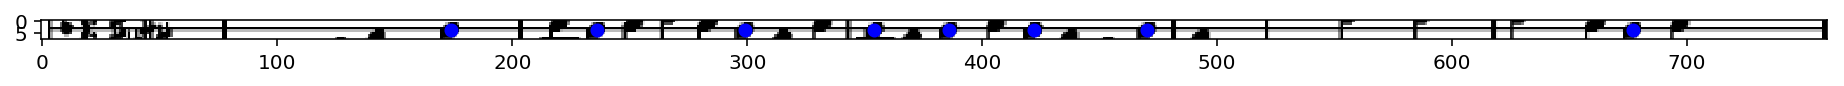

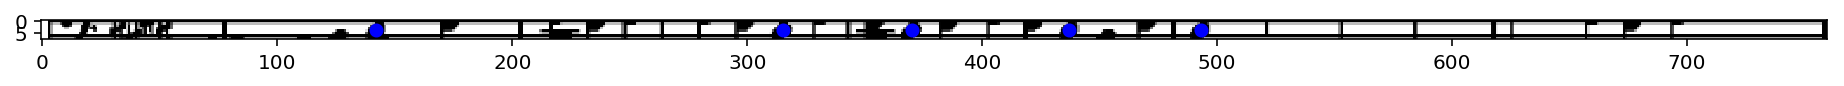

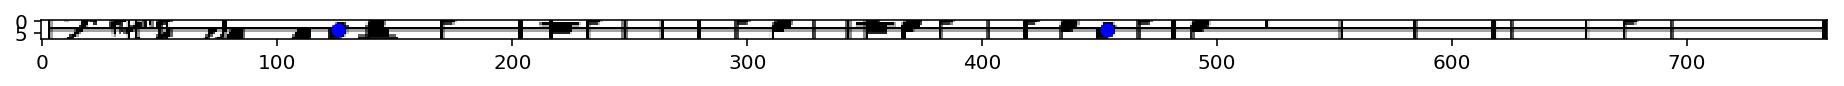

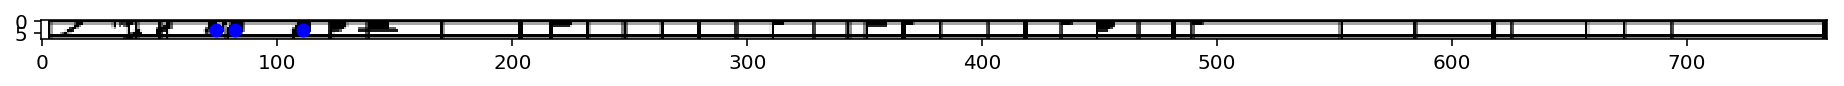

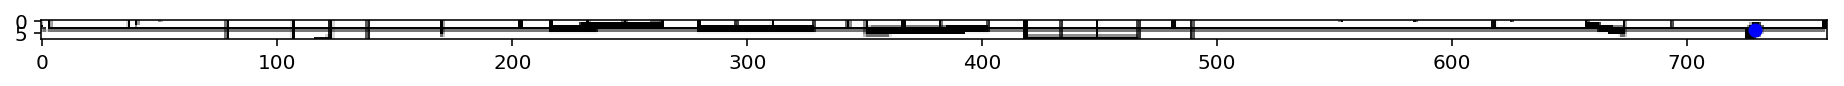

In [91]:
for index in range(len(uq_y)):
    t, l, b, r = system_mungos[0].bounding_box
    t = uq_y[index] - 4
    b = uq_y[index] + 4
    top, left, bottom, right = t,l,b,r
#     plt.figure("Strip", figsize=(10,20))
    strip = img[top:bottom, left:right]
    
    plt.figure("strip", figsize=(16,20))
    plt.imshow(strip, cmap="gray")
    
    curr_vals = assoc_x[uq_y[index]]
    for x in curr_vals:
        plt.plot(x, uq_y[index] - top, 'bo')
    plt.show()

In [ ]:
for piece_name in pieces:
    piece = Piece(root=DATA_ROOT_MSMD, name=piece_name)

    if piece.available_scores:
        score = piece.load_score(piece.available_scores[0])
    else:
        continue
    
#     mungos = score.load_mungos()
#     mdict = {m.objid: m for m in mungos}
#     mungos_per_page = score.load_mungos(by_page=True)
    images = score.load_images()
    
    for image in images:
        print("shape of image: " + str(image.shape))

In [61]:
for piece_name in piece_list:
    if Piece(root=DATA_ROOT_MSMD, name=piece_name):
        piece = Piece(root=DATA_ROOT_MSMD, name=piece_name)
    else:
        continue
    if piece.available_scores:
        score = piece.load_score(piece.available_scores[0])
    else:
        continue
    
#     mungos = score.load_mungos()
#     mdict = {m.objid: m for m in mungos}
#     mungos_per_page = score.load_mungos(by_page=True)
    images = score.load_images()
    
    for image in images:
        print("shape of image: " + str(image.shape))

shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (118

shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (118

shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (118

shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1080, 835)
shape of image: (1080, 835)
shape of image: (1080, 835)
shape of image: (1080, 835)
shape of image: (1080, 835)
shape of image: (1080, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (118

shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (118

shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (118

shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (1181, 835)
shape of image: (118

MSMDDBError: Piece Traditional__traditioner_af_swenska_folk_dansar.3.18__traditioner_af_swenska_folk_dansar.3.18_tempo-1000_grand-piano-YDP-20160804 in collection /data/mirlab/msmd/msmd_aug/msmd_aug does not exist

Everything is the same size of (1181,835) except for a few that were (1080,835).

In [40]:
for root, dirs, filenames in os.walk(DATA_ROOT_MSMD):
    print(filenames)

[]
['Traditional__traditioner_af_swenska_folk_dansar.3.18__traditioner_af_swenska_folk_dansar.3.18.norm.ly', 'Traditional__traditioner_af_swenska_folk_dansar.3.18__traditioner_af_swenska_folk_dansar.3.18.midi', 'Traditional__traditioner_af_swenska_folk_dansar.3.18__traditioner_af_swenska_folk_dansar.3.18.ly']
[]
['Traditional__traditioner_af_swenska_folk_dansar.3.18__traditioner_af_swenska_folk_dansar.3.18_tempo-1000_grand-piano-YDP-20160804.midi']
['Traditional__traditioner_af_swenska_folk_dansar.3.18__traditioner_af_swenska_folk_dansar.3.18_tempo-1000_grand-piano-YDP-20160804.flac_midi.npy', 'Traditional__traditioner_af_swenska_folk_dansar.3.18__traditioner_af_swenska_folk_dansar.3.18_tempo-1000_grand-piano-YDP-20160804.flac_spec.npy', 'Traditional__traditioner_af_swenska_folk_dansar.3.18__traditioner_af_swenska_folk_dansar.3.18_tempo-1000_grand-piano-YDP-20160804.flac_notes.npy', 'Traditional__traditioner_af_swenska_folk_dansar.3.18__traditioner_af_swenska_folk_dansar.3.18_tempo-100

['Traditional__traditioner_af_swenska_folk_dansar.1.17__traditioner_af_swenska_folk_dansar.1.17.ly', 'Traditional__traditioner_af_swenska_folk_dansar.1.17__traditioner_af_swenska_folk_dansar.1.17.midi', 'Traditional__traditioner_af_swenska_folk_dansar.1.17__traditioner_af_swenska_folk_dansar.1.17.norm.ly']
[]
['Traditional__traditioner_af_swenska_folk_dansar.1.17__traditioner_af_swenska_folk_dansar.1.17_tempo-950_acoustic_piano_imis_1.midi']
['Traditional__traditioner_af_swenska_folk_dansar.1.17__traditioner_af_swenska_folk_dansar.1.17_tempo-950_acoustic_piano_imis_1.flac_spec.npy', 'Traditional__traditioner_af_swenska_folk_dansar.1.17__traditioner_af_swenska_folk_dansar.1.17_tempo-950_acoustic_piano_imis_1.flac_notes.npy', 'Traditional__traditioner_af_swenska_folk_dansar.1.17__traditioner_af_swenska_folk_dansar.1.17_tempo-950_acoustic_piano_imis_1.flac_midi.npy', 'Traditional__traditioner_af_swenska_folk_dansar.1.17__traditioner_af_swenska_folk_dansar.1.17_tempo-950_acoustic_piano_imi

['MinkusLA__bayadere-acteII__bayadere-acteII_tempo-900_YamahaGrandPiano_spec.npy', 'MinkusLA__bayadere-acteII__bayadere-acteII_tempo-900_YamahaGrandPiano_onsets.npy']
['MinkusLA__bayadere-acteII__bayadere-acteII_tempo-900_YamahaGrandPiano.flac']
['MinkusLA__bayadere-acteII__bayadere-acteII_tempo-950_YamahaGrandPiano.midi']
['MinkusLA__bayadere-acteII__bayadere-acteII_tempo-950_YamahaGrandPiano.flac_spec.npy', 'MinkusLA__bayadere-acteII__bayadere-acteII_tempo-950_YamahaGrandPiano.flac_notes.npy', 'MinkusLA__bayadere-acteII__bayadere-acteII_tempo-950_YamahaGrandPiano.flac_midi.npy', 'MinkusLA__bayadere-acteII__bayadere-acteII_tempo-950_YamahaGrandPiano.flac_onsets.npy']
['MinkusLA__bayadere-acteII__bayadere-acteII_tempo-950_YamahaGrandPiano_onsets.npy', 'MinkusLA__bayadere-acteII__bayadere-acteII_tempo-950_YamahaGrandPiano_spec.npy']
['MinkusLA__bayadere-acteII__bayadere-acteII_tempo-950_YamahaGrandPiano.flac']
[]
['MinkusLA__bayadere-acteII__bayadere-acteII_ly.pdf']
['01.xml', '02.xml']

['SchumannR__O68__schumann-op68-03-chanson-fredonnee_tempo-1000_ElectricPiano.midi']
['SchumannR__O68__schumann-op68-03-chanson-fredonnee_tempo-1000_ElectricPiano.flac_spec.npy', 'SchumannR__O68__schumann-op68-03-chanson-fredonnee_tempo-1000_ElectricPiano.flac_midi.npy', 'SchumannR__O68__schumann-op68-03-chanson-fredonnee_tempo-1000_ElectricPiano.flac_onsets.npy', 'SchumannR__O68__schumann-op68-03-chanson-fredonnee_tempo-1000_ElectricPiano.flac_notes.npy']
['SchumannR__O68__schumann-op68-03-chanson-fredonnee_tempo-1000_ElectricPiano_onsets.npy', 'SchumannR__O68__schumann-op68-03-chanson-fredonnee_tempo-1000_ElectricPiano_spec.npy']
['SchumannR__O68__schumann-op68-03-chanson-fredonnee_tempo-1000_ElectricPiano.flac']
['SchumannR__O68__schumann-op68-03-chanson-fredonnee_tempo-1100_YamahaGrandPiano.midi']
['SchumannR__O68__schumann-op68-03-chanson-fredonnee_tempo-1100_YamahaGrandPiano.flac_spec.npy', 'SchumannR__O68__schumann-op68-03-chanson-fredonnee_tempo-1100_YamahaGrandPiano.flac_notes

['BurgmullerJFF__O100__25EF-02_tempo-1000_grand-piano-YDP-20160804.midi']
['BurgmullerJFF__O100__25EF-02_tempo-1000_grand-piano-YDP-20160804.flac_spec.npy', 'BurgmullerJFF__O100__25EF-02_tempo-1000_grand-piano-YDP-20160804.flac_notes.npy', 'BurgmullerJFF__O100__25EF-02_tempo-1000_grand-piano-YDP-20160804.flac_midi.npy', 'BurgmullerJFF__O100__25EF-02_tempo-1000_grand-piano-YDP-20160804.flac_onsets.npy']
['BurgmullerJFF__O100__25EF-02_tempo-1000_grand-piano-YDP-20160804_spec.npy', 'BurgmullerJFF__O100__25EF-02_tempo-1000_grand-piano-YDP-20160804_onsets.npy']
['BurgmullerJFF__O100__25EF-02_tempo-1000_grand-piano-YDP-20160804.flac']
['BurgmullerJFF__O100__25EF-02_tempo-1000_ElectricPiano.midi']
['BurgmullerJFF__O100__25EF-02_tempo-1000_ElectricPiano.flac_notes.npy', 'BurgmullerJFF__O100__25EF-02_tempo-1000_ElectricPiano.flac_onsets.npy', 'BurgmullerJFF__O100__25EF-02_tempo-1000_ElectricPiano.flac_spec.npy', 'BurgmullerJFF__O100__25EF-02_tempo-1000_ElectricPiano.flac_midi.npy']
['Burgmuller

[]
['PachelbelJ__fugue-3-7__fugue-3-7_ly.pdf']
['01.xml', '02.xml']
['02.png', '01.png']
['systems_02.npy', 'notes_02.npy', 'bars_01.npy', 'notes_01.npy', 'bars_02.npy', 'systems_01.npy']
['HanonCL__virtuoso-pianist-pt1__hanon-book.ly', 'HanonCL__virtuoso-pianist-pt1__hanon-book.norm.ly']
[]
[]
['HanonCL__virtuoso-pianist-pt1__hanon-book_ly.pdf']
['06.png', '02.png', '09.png', '14.png', '17.png', '08.png', '01.png', '07.png', '19.png', '21.png', '18.png', '10.png', '04.png', '03.png', '15.png', '20.png', '13.png', '11.png', '05.png', '12.png', '16.png']
[]
['BachJS__BWV807__bach-english-suite-2-prelude.norm.ly', 'BachJS__BWV807__bach-english-suite-2-prelude.midi', 'BachJS__BWV807__bach-english-suite-2-prelude.ly']
[]
['output.npy', 'BachJS__BWV807__bach-english-suite-2-prelude_tempo-950_YamahaGrandPiano.midi']
['BachJS__BWV807__bach-english-suite-2-prelude_tempo-950_YamahaGrandPiano.flac_midi.npy', 'BachJS__BWV807__bach-english-suite-2-prelude_tempo-950_YamahaGrandPiano.flac_notes.npy'

['Mendelssohn-BartholdyF__O53__SongWW_opus53no5_tempo-1000_YamahaGrandPiano.flac']
['Mendelssohn-BartholdyF__O53__SongWW_opus53no5_tempo-1000_ElectricPiano.midi']
['Mendelssohn-BartholdyF__O53__SongWW_opus53no5_tempo-1000_ElectricPiano.flac_notes.npy', 'Mendelssohn-BartholdyF__O53__SongWW_opus53no5_tempo-1000_ElectricPiano.flac_midi.npy', 'Mendelssohn-BartholdyF__O53__SongWW_opus53no5_tempo-1000_ElectricPiano.flac_spec.npy', 'Mendelssohn-BartholdyF__O53__SongWW_opus53no5_tempo-1000_ElectricPiano.flac_onsets.npy']
['Mendelssohn-BartholdyF__O53__SongWW_opus53no5_tempo-1000_ElectricPiano_spec.npy', 'Mendelssohn-BartholdyF__O53__SongWW_opus53no5_tempo-1000_ElectricPiano_onsets.npy']
['Mendelssohn-BartholdyF__O53__SongWW_opus53no5_tempo-1000_ElectricPiano.flac']
[]
['Mendelssohn-BartholdyF__O53__SongWW_opus53no5_ly.pdf']
['01.xml', '04.xml', '03.xml', '02.xml']
['02.png', '01.png', '04.png', '03.png']
['systems_02.npy', 'notes_02.npy', 'bars_03.npy', 'bars_04.npy', 'bars_01.npy', 'systems_0

['BehrF__in_may_piano__in_may_piano_tempo-1000_ElectricPiano.flac_spec.npy', 'BehrF__in_may_piano__in_may_piano_tempo-1000_ElectricPiano.flac_onsets.npy', 'BehrF__in_may_piano__in_may_piano_tempo-1000_ElectricPiano.flac_notes.npy', 'BehrF__in_may_piano__in_may_piano_tempo-1000_ElectricPiano.flac_midi.npy']
['BehrF__in_may_piano__in_may_piano_tempo-1000_ElectricPiano_spec.npy', 'BehrF__in_may_piano__in_may_piano_tempo-1000_ElectricPiano_onsets.npy']
['BehrF__in_may_piano__in_may_piano_tempo-1000_ElectricPiano.flac']
['BehrF__in_may_piano__in_may_piano_tempo-1100_acoustic_piano_imis_1.midi']
['BehrF__in_may_piano__in_may_piano_tempo-1100_acoustic_piano_imis_1.flac_midi.npy', 'BehrF__in_may_piano__in_may_piano_tempo-1100_acoustic_piano_imis_1.flac_notes.npy', 'BehrF__in_may_piano__in_may_piano_tempo-1100_acoustic_piano_imis_1.flac_spec.npy', 'BehrF__in_may_piano__in_may_piano_tempo-1100_acoustic_piano_imis_1.flac_onsets.npy']
['BehrF__in_may_piano__in_may_piano_tempo-1100_acoustic_piano_i

['BachJS__BWV849__bwv849a_tempo-1050_acoustic_piano_imis_1_spec.npy', 'BachJS__BWV849__bwv849a_tempo-1050_acoustic_piano_imis_1_onsets.npy']
['BachJS__BWV849__bwv849a_tempo-1050_acoustic_piano_imis_1.flac']
[]
['BachJS__BWV849__bwv849a_ly.pdf']
['01.xml', '02.xml']
['02.png', '01.png']
['systems_02.npy', 'notes_02.npy', 'bars_01.npy', 'notes_01.npy', 'bars_02.npy', 'systems_01.npy']
['BurgmullerJFF__O100__25EF-09.ly', 'BurgmullerJFF__O100__25EF-09.midi', 'BurgmullerJFF__O100__25EF-09.norm.ly']
[]
['BurgmullerJFF__O100__25EF-09_tempo-1000_ElectricPiano.midi']
['BurgmullerJFF__O100__25EF-09_tempo-1000_ElectricPiano.flac_midi.npy', 'BurgmullerJFF__O100__25EF-09_tempo-1000_ElectricPiano.flac_spec.npy', 'BurgmullerJFF__O100__25EF-09_tempo-1000_ElectricPiano.flac_notes.npy', 'BurgmullerJFF__O100__25EF-09_tempo-1000_ElectricPiano.flac_onsets.npy']
['BurgmullerJFF__O100__25EF-09_tempo-1000_ElectricPiano_spec.npy', 'BurgmullerJFF__O100__25EF-09_tempo-1000_ElectricPiano_onsets.npy']
['Burgmuller

['BachJS__BWV988__bwv-988-v23_tempo-1000_grand-piano-YDP-20160804_spec.npy', 'BachJS__BWV988__bwv-988-v23_tempo-1000_grand-piano-YDP-20160804_onsets.npy']
['BachJS__BWV988__bwv-988-v23_tempo-1000_grand-piano-YDP-20160804.flac']
['BachJS__BWV988__bwv-988-v23_tempo-1050_ElectricPiano.midi']
['BachJS__BWV988__bwv-988-v23_tempo-1050_ElectricPiano.flac_spec.npy', 'BachJS__BWV988__bwv-988-v23_tempo-1050_ElectricPiano.flac_notes.npy', 'BachJS__BWV988__bwv-988-v23_tempo-1050_ElectricPiano.flac_midi.npy', 'BachJS__BWV988__bwv-988-v23_tempo-1050_ElectricPiano.flac_onsets.npy']
['BachJS__BWV988__bwv-988-v23_tempo-1050_ElectricPiano_spec.npy', 'BachJS__BWV988__bwv-988-v23_tempo-1050_ElectricPiano_onsets.npy']
['BachJS__BWV988__bwv-988-v23_tempo-1050_ElectricPiano.flac']
['BachJS__BWV988__bwv-988-v23_tempo-900_ElectricPiano.midi']
['BachJS__BWV988__bwv-988-v23_tempo-900_ElectricPiano.flac_notes.npy', 'BachJS__BWV988__bwv-988-v23_tempo-900_ElectricPiano.flac_onsets.npy', 'BachJS__BWV988__bwv-988-v23

['BurgmullerJFF__O100__25EF-14_tempo-1000_grand-piano-YDP-20160804_onsets.npy', 'BurgmullerJFF__O100__25EF-14_tempo-1000_grand-piano-YDP-20160804_spec.npy']
['BurgmullerJFF__O100__25EF-14_tempo-1000_grand-piano-YDP-20160804.flac']
['BurgmullerJFF__O100__25EF-14_tempo-1050_YamahaGrandPiano.midi']
['BurgmullerJFF__O100__25EF-14_tempo-1050_YamahaGrandPiano.flac_spec.npy', 'BurgmullerJFF__O100__25EF-14_tempo-1050_YamahaGrandPiano.flac_notes.npy', 'BurgmullerJFF__O100__25EF-14_tempo-1050_YamahaGrandPiano.flac_midi.npy', 'BurgmullerJFF__O100__25EF-14_tempo-1050_YamahaGrandPiano.flac_onsets.npy']
['BurgmullerJFF__O100__25EF-14_tempo-1050_YamahaGrandPiano_spec.npy', 'BurgmullerJFF__O100__25EF-14_tempo-1050_YamahaGrandPiano_onsets.npy']
['BurgmullerJFF__O100__25EF-14_tempo-1050_YamahaGrandPiano.flac']
['BurgmullerJFF__O100__25EF-14_tempo-1000_ElectricPiano.midi']
['BurgmullerJFF__O100__25EF-14_tempo-1000_ElectricPiano.flac_notes.npy', 'BurgmullerJFF__O100__25EF-14_tempo-1000_ElectricPiano.flac_

['CzernyC__O840__czerny-op840-3_tempo-1000_ElectricPiano.midi']
['CzernyC__O840__czerny-op840-3_tempo-1000_ElectricPiano.flac_notes.npy', 'CzernyC__O840__czerny-op840-3_tempo-1000_ElectricPiano.flac_spec.npy', 'CzernyC__O840__czerny-op840-3_tempo-1000_ElectricPiano.flac_midi.npy', 'CzernyC__O840__czerny-op840-3_tempo-1000_ElectricPiano.flac_onsets.npy']
['CzernyC__O840__czerny-op840-3_tempo-1000_ElectricPiano_spec.npy', 'CzernyC__O840__czerny-op840-3_tempo-1000_ElectricPiano_onsets.npy']
['CzernyC__O840__czerny-op840-3_tempo-1000_ElectricPiano.flac']
['CzernyC__O840__czerny-op840-3_tempo-900_YamahaGrandPiano.midi']
['CzernyC__O840__czerny-op840-3_tempo-900_YamahaGrandPiano.flac_midi.npy', 'CzernyC__O840__czerny-op840-3_tempo-900_YamahaGrandPiano.flac_notes.npy', 'CzernyC__O840__czerny-op840-3_tempo-900_YamahaGrandPiano.flac_onsets.npy', 'CzernyC__O840__czerny-op840-3_tempo-900_YamahaGrandPiano.flac_spec.npy']
['CzernyC__O840__czerny-op840-3_tempo-900_YamahaGrandPiano_spec.npy', 'Czerny

['SchumannR__O68__schumann-op68-11-sicilienne_tempo-950_acoustic_piano_imis_1.midi']
['SchumannR__O68__schumann-op68-11-sicilienne_tempo-950_acoustic_piano_imis_1.flac_onsets.npy', 'SchumannR__O68__schumann-op68-11-sicilienne_tempo-950_acoustic_piano_imis_1.flac_spec.npy', 'SchumannR__O68__schumann-op68-11-sicilienne_tempo-950_acoustic_piano_imis_1.flac_midi.npy', 'SchumannR__O68__schumann-op68-11-sicilienne_tempo-950_acoustic_piano_imis_1.flac_notes.npy']
['SchumannR__O68__schumann-op68-11-sicilienne_tempo-950_acoustic_piano_imis_1_onsets.npy', 'SchumannR__O68__schumann-op68-11-sicilienne_tempo-950_acoustic_piano_imis_1_spec.npy']
['SchumannR__O68__schumann-op68-11-sicilienne_tempo-950_acoustic_piano_imis_1.flac']
['SchumannR__O68__schumann-op68-11-sicilienne_tempo-1050_acoustic_piano_imis_1.midi']
['SchumannR__O68__schumann-op68-11-sicilienne_tempo-1050_acoustic_piano_imis_1.flac_onsets.npy', 'SchumannR__O68__schumann-op68-11-sicilienne_tempo-1050_acoustic_piano_imis_1.flac_spec.npy'

['BachJS__BWV791__bwv791_tempo-900_YamahaGrandPiano.flac']
['output.npy', 'BachJS__BWV791__bwv791_tempo-1000_ElectricPiano.midi']
['BachJS__BWV791__bwv791_tempo-1000_ElectricPiano.flac_spec.npy', 'BachJS__BWV791__bwv791_tempo-1000_ElectricPiano.flac_midi.npy', 'BachJS__BWV791__bwv791_tempo-1000_ElectricPiano.flac_notes.npy', 'BachJS__BWV791__bwv791_tempo-1000_ElectricPiano.flac_onsets.npy']
['BachJS__BWV791__bwv791_tempo-1000_ElectricPiano_onsets.npy', 'BachJS__BWV791__bwv791_tempo-1000_ElectricPiano_spec.npy']
['BachJS__BWV791__bwv791_tempo-1000_ElectricPiano.flac']
['output.npy', 'BachJS__BWV791__bwv791_tempo-1000_grand-piano-YDP-20160804.midi']
['BachJS__BWV791__bwv791_tempo-1000_grand-piano-YDP-20160804.flac_midi.npy', 'BachJS__BWV791__bwv791_tempo-1000_grand-piano-YDP-20160804.flac_spec.npy', 'BachJS__BWV791__bwv791_tempo-1000_grand-piano-YDP-20160804.flac_onsets.npy', 'BachJS__BWV791__bwv791_tempo-1000_grand-piano-YDP-20160804.flac_notes.npy']
['BachJS__BWV791__bwv791_tempo-1000_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import cv2
crop_img = images[0][top:bottom, left:right]
cv2.imshow("cropped", crop_img)
cv2.waitKey(0)

In [63]:
def display_image_in_actual_size(im):

    dpi = 80
    height, width = im.shape
    print(im.shape)

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    plt.figure(figsize=figsize)


    # Display the image.
    plt.imshow(im, cmap='gray')

    plt.show()

In [64]:
display_image_in_actual_size(images[0][top:bottom][left:right])

(0, 835)


/home/mirlab/miniconda3/lib/python3.6/site-packages/matplotlib/image.py:865: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  self.axes.set_ylim((ymin, ymax), auto=None)


ValueError: 'box_aspect' and 'fig_aspect' must be positive

<Figure size 751.5x0 with 1 Axes>

## Loading performance data
In the next couple of cells we load the performance (audio) part of the piece.<br>
For completeness we also show the corresponding midi matrix.

In [11]:
# get the first one of the available performance identifiers
performance_key = piece.available_performances[0]
print(performance_key)

BachJS__BWV849__bwv849b_tempo-1000_ElectricPiano


In [12]:
# load the performance
performance = piece.load_performance(performance_key, require_audio=False)

In [ ]:
# load spectrogram
spectrogram = performance.load_spectrogram()

# show the spectrogram
plt.figure("Spectrogram", figsize=(16, 3))
plt.imshow(spectrogram, cmap="viridis", aspect="auto", origin="lower")
plt.title("Spectrogram")
plt.ylabel("%d Frequency Bins" % spectrogram.shape[0])
plt.xlabel("%d Spectrogram Frames" % spectrogram.shape[1])
plt.show()

In [ ]:
# load midi matrix
midi_matrix = performance.load_midi_matrix()

# show the midi matrix
plt.figure("Midi Matrix", figsize=(16, 3))
plt.imshow(midi_matrix, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
plt.title("Midi Matrix")
plt.ylabel("%d Pitches" % midi_matrix.shape[0])
plt.xlabel("%d Spectrogram Frames" % midi_matrix.shape[1])
plt.show()

## Aligning the two modalities
The last thing to do is to align the two modalities.

In [ ]:
# running the alignment procedure
alignment = align_score_to_performance(score, performance)

In [ ]:
# to make this easier for us we make it a dictionary
# and accessible by object id
mung_dict = {m.objid: m for m in mungos}

In [ ]:
# get one entry in the alignment matrix
# (this is by id)
m_objid, e_idx = alignment[18]

In [ ]:
# here we load the actual note events
note_events = performance.load_note_events()

# note events contains a matrix of midi events as 
# described here: http://madmom.readthedocs.io/en/latest/modules/utils/midi.html
# The matrix column contain: ‘onset time’, ‘pitch’, ‘duration’, ‘velocity’, ‘channel’
print(np.around(note_events, 2))

In [ ]:
# now we actually get the data
note_object = mung_dict[m_objid]
midi_event = note_events[e_idx]

In [ ]:
# given the midi note event we compute the corresponding onset frame
dt = 1.0 / FPS
onset_frame = int(np.ceil(midi_event[0] / dt))

## Visualizing the Final Result

In [ ]:
# show the spectrogram
plt.figure("Alignment", figsize=(16, 8))

plt.subplot(2, 1, 1)
plt.imshow(images[0], cmap="gray")
plt.plot(note_object.middle[1], note_object.middle[0], 'mo', markersize=15, alpha=0.5)
plt.ylim([note_object.middle[0] + 100, note_object.middle[0] - 100])
plt.text(note_object.middle[1], note_object.middle[0] - 10, "Target Note",
         bbox={'facecolor':'w', 'alpha':0.8, 'pad':3},
         ha="center", va="bottom", color="m", fontsize=20)

plt.subplot(2, 1, 2)
plt.imshow(spectrogram, cmap="viridis", aspect="auto", origin="lower")
plt.plot([onset_frame, onset_frame], [0, spectrogram.shape[0]], 'w-', linewidth=5, alpha=0.5)
plt.xlim([onset_frame - 100, onset_frame + 100])
plt.text(onset_frame, spectrogram.shape[0] // 2, "Target Frame",
         bbox={'facecolor':'w', 'alpha':0.8, 'pad':3},
         ha="center", color="k", fontsize=20)

plt.show()